# **HOME CREDIT SCORE CARD MODEL**

Muhammad Fauzi Reza
https://www.linkedin.com/in/fauzi-reza-a4513a141/

**Background**

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

On this Project we will perform some algorithm of machine learning methods to make these prediction. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

Dataset can be downloaded from Kaggle https://www.kaggle.com/competitions/home-credit-default-risk/data

We will only focus on 2 main table, application train and application test to predict client repayment abilities

**Objective**
1. Find the characteristics of client who have problem in repaying the loan 

2. Predict whether or not a client will be able to repay a loan


**Steps**
1. Perform EDA to find the insight through visualization
2. Handle missing value and Impute them with proper methods
3. Handling Outliers
4. Perform Label Encoder
5. Handling Data Imbalance
6. Determine the best feature from Feature Selection
7. Modeling with some supervised learning algorithm
8. Evaluation model
9. Predict the real test data
10. Reccomendatition

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Train-Test Split
from sklearn.model_selection import train_test_split

# Machine Learning Model
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.utils import resample  
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression 

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import roc_auc_score 

# Disable Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# EDA

In [ ]:
df_train = pd.read_csv('application_train.csv')
print('There are %d rows and %d columns in this DataFrame' %df_train.shape)
df_train.head()

There are 307511 rows and 122 columns in this DataFrame


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

## Check imbalance DataFrame

Check Target:

0 means No Having Difficulties in payment

1 means Having Difficulties in payment

In [ ]:
df_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [ ]:
df_train['TARGET'].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

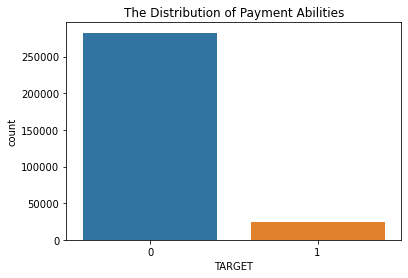

In [ ]:
sns.countplot(data=df_train, x='TARGET')
plt.title('The Distribution of Payment Abilities')
plt.show()

91.9 % or 282k client in **TARGET=0** is indicated client can pay installment at given time no late payment or having difficulty on payment.

8.07 % or 24k client in **TARGET =1** is indicated client having payment difficulties: he/she had late payment more than X days on at least one of the first Y installments. 

As you can see, This DataFrame is imbalanced, therefore we have to give some treatment first or resampling. We will do later.

## Bivariate Analysis

### Bivariate Analysis for Categorical Data

Bivariate Analysis: Categorical Data vs Target

Code Gender, Contract Type, Car Ownership Status and Realty/House Ownership Status

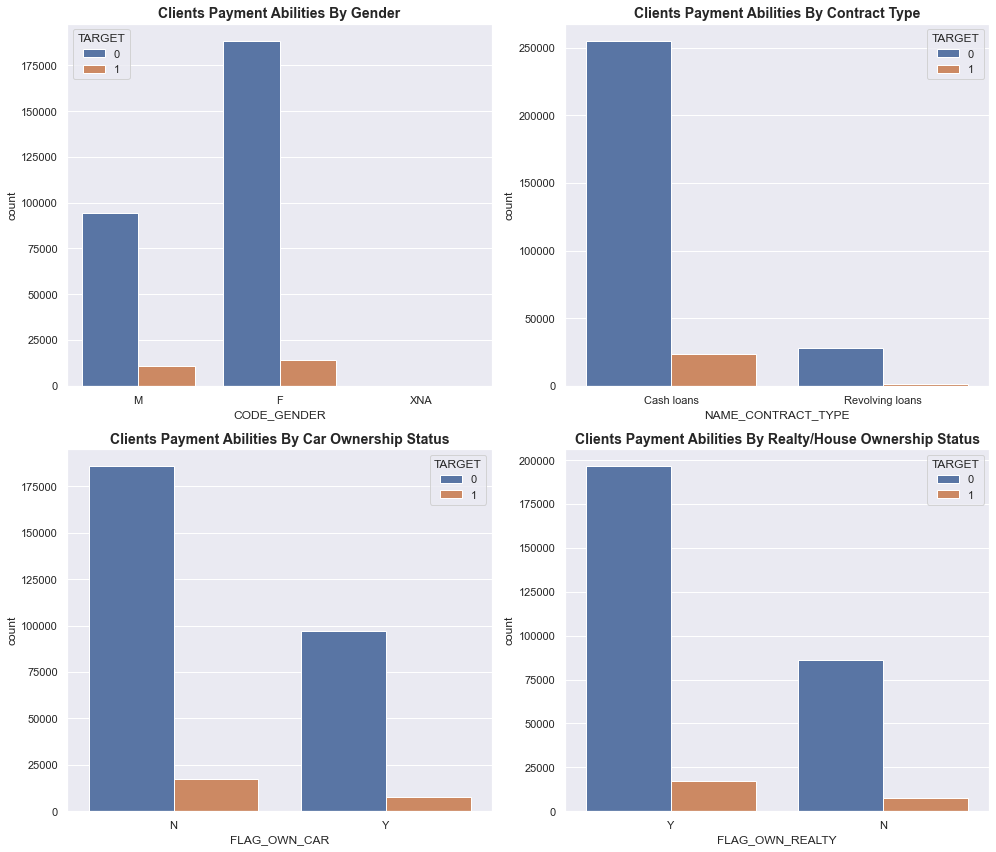

In [ ]:
sns.set(style='darkgrid')
fig, ax = plt.subplots(2,2, figsize=(14, 12))

ax[0][0].set_title('Clients Payment Abilities By Gender', fontweight='bold', fontsize=14)
sns.countplot(data=df_train, x='CODE_GENDER', hue='TARGET', ax=ax[0][0])

ax[0][1].set_title('Clients Payment Abilities By Contract Type', fontweight='bold', fontsize=14)
sns.countplot(data=df_train, x='NAME_CONTRACT_TYPE', hue='TARGET', ax=ax[0][1])

ax[1][0].set_title('Clients Payment Abilities By Car Ownership Status', fontweight='bold', fontsize=14)
sns.countplot(data=df_train, x='FLAG_OWN_CAR', hue='TARGET', ax=ax[1][0])

ax[1][1].set_title('Clients Payment Abilities By Realty/House Ownership Status', fontweight='bold', fontsize=14)
sns.countplot(data=df_train, x='FLAG_OWN_REALTY', hue='TARGET', ax=ax[1][1])

plt.tight_layout()
plt.show()

I will create pivot table function to simplify exploration process

In [ ]:
#Creating pivot table function based on target
def pivot_loan(df,target):
  df_loan = pd.pivot_table(
      df[['SK_ID_CURR',target,'TARGET']],
      index       =[target],
      columns     =['TARGET'],
      aggfunc     ="count",
      fill_value  =0,
  ).reset_index()

  df_loan.columns=[target,'Having No Difficulties','Having Difficulties']

  df_loan['total'] = df_loan['Having No Difficulties'] + df_loan['Having Difficulties']
  df_loan["Difficulty_Rate"] = (df_loan['Having Difficulties']/df_loan['total'])*100
  return df_loan

In [ ]:
pivot_loan(df_train,"CODE_GENDER")

,CODE_GENDER,Having No Difficulties,Having Difficulties,total,Difficulty_Rate
0,F,188278,14170,202448,6.999328
1,M,94404,10655,105059,10.141920
2,XNA,4,0,4,0.000000


Majority of our client is **Female** about 202k client and **Man** only 105k client.

In fact **Male** having more problem during repay the loans around 10.14% rather than **Female** 6.9%

In [ ]:
pivot_loan(df_train,"NAME_CONTRACT_TYPE")

,NAME_CONTRACT_TYPE,Having No Difficulties,Having Difficulties,total,Difficulty_Rate
0,Cash loans,255011,23221,278232,8.345913
1,Revolving loans,27675,1604,29279,5.478329


Majority of contract that our client take is **Cash loans** around 278k and **Revolving loans** only 29k. 

In fact **Cash loans** having more problem during repay the loans around 8.3% rather than **Revolving loans** 5.4%

In [ ]:
pivot_loan(df_train,"FLAG_OWN_CAR")

,FLAG_OWN_CAR,Having No Difficulties,Having Difficulties,total,Difficulty_Rate
0,N,185675,17249,202924,8.500227
1,Y,97011,7576,104587,7.243730


Majority of our client **have no an own car** around 202k rather than **have own car around 104k**.

In fact **have no an own car** having more problem during repay the loans around 8.5% rather than **have an own car** around 7.2%. Not too significant.

In [ ]:
pivot_loan(df_train,"FLAG_OWN_REALTY")

,FLAG_OWN_REALTY,Having No Difficulties,Having Difficulties,total,Difficulty_Rate
0,N,86357,7842,94199,8.324929
1,Y,196329,16983,213312,7.961577


Majority of our client **have own House/Flat** around 213k rather than **have no own House/Flat**  around 94k

In fact **have no own House/Flat** having more problem during repay the loans around 8.3% rather than **having own House/Flat**  7.9%. Not too significant.

Type Suite, Income Type, Education Type, and Family Status

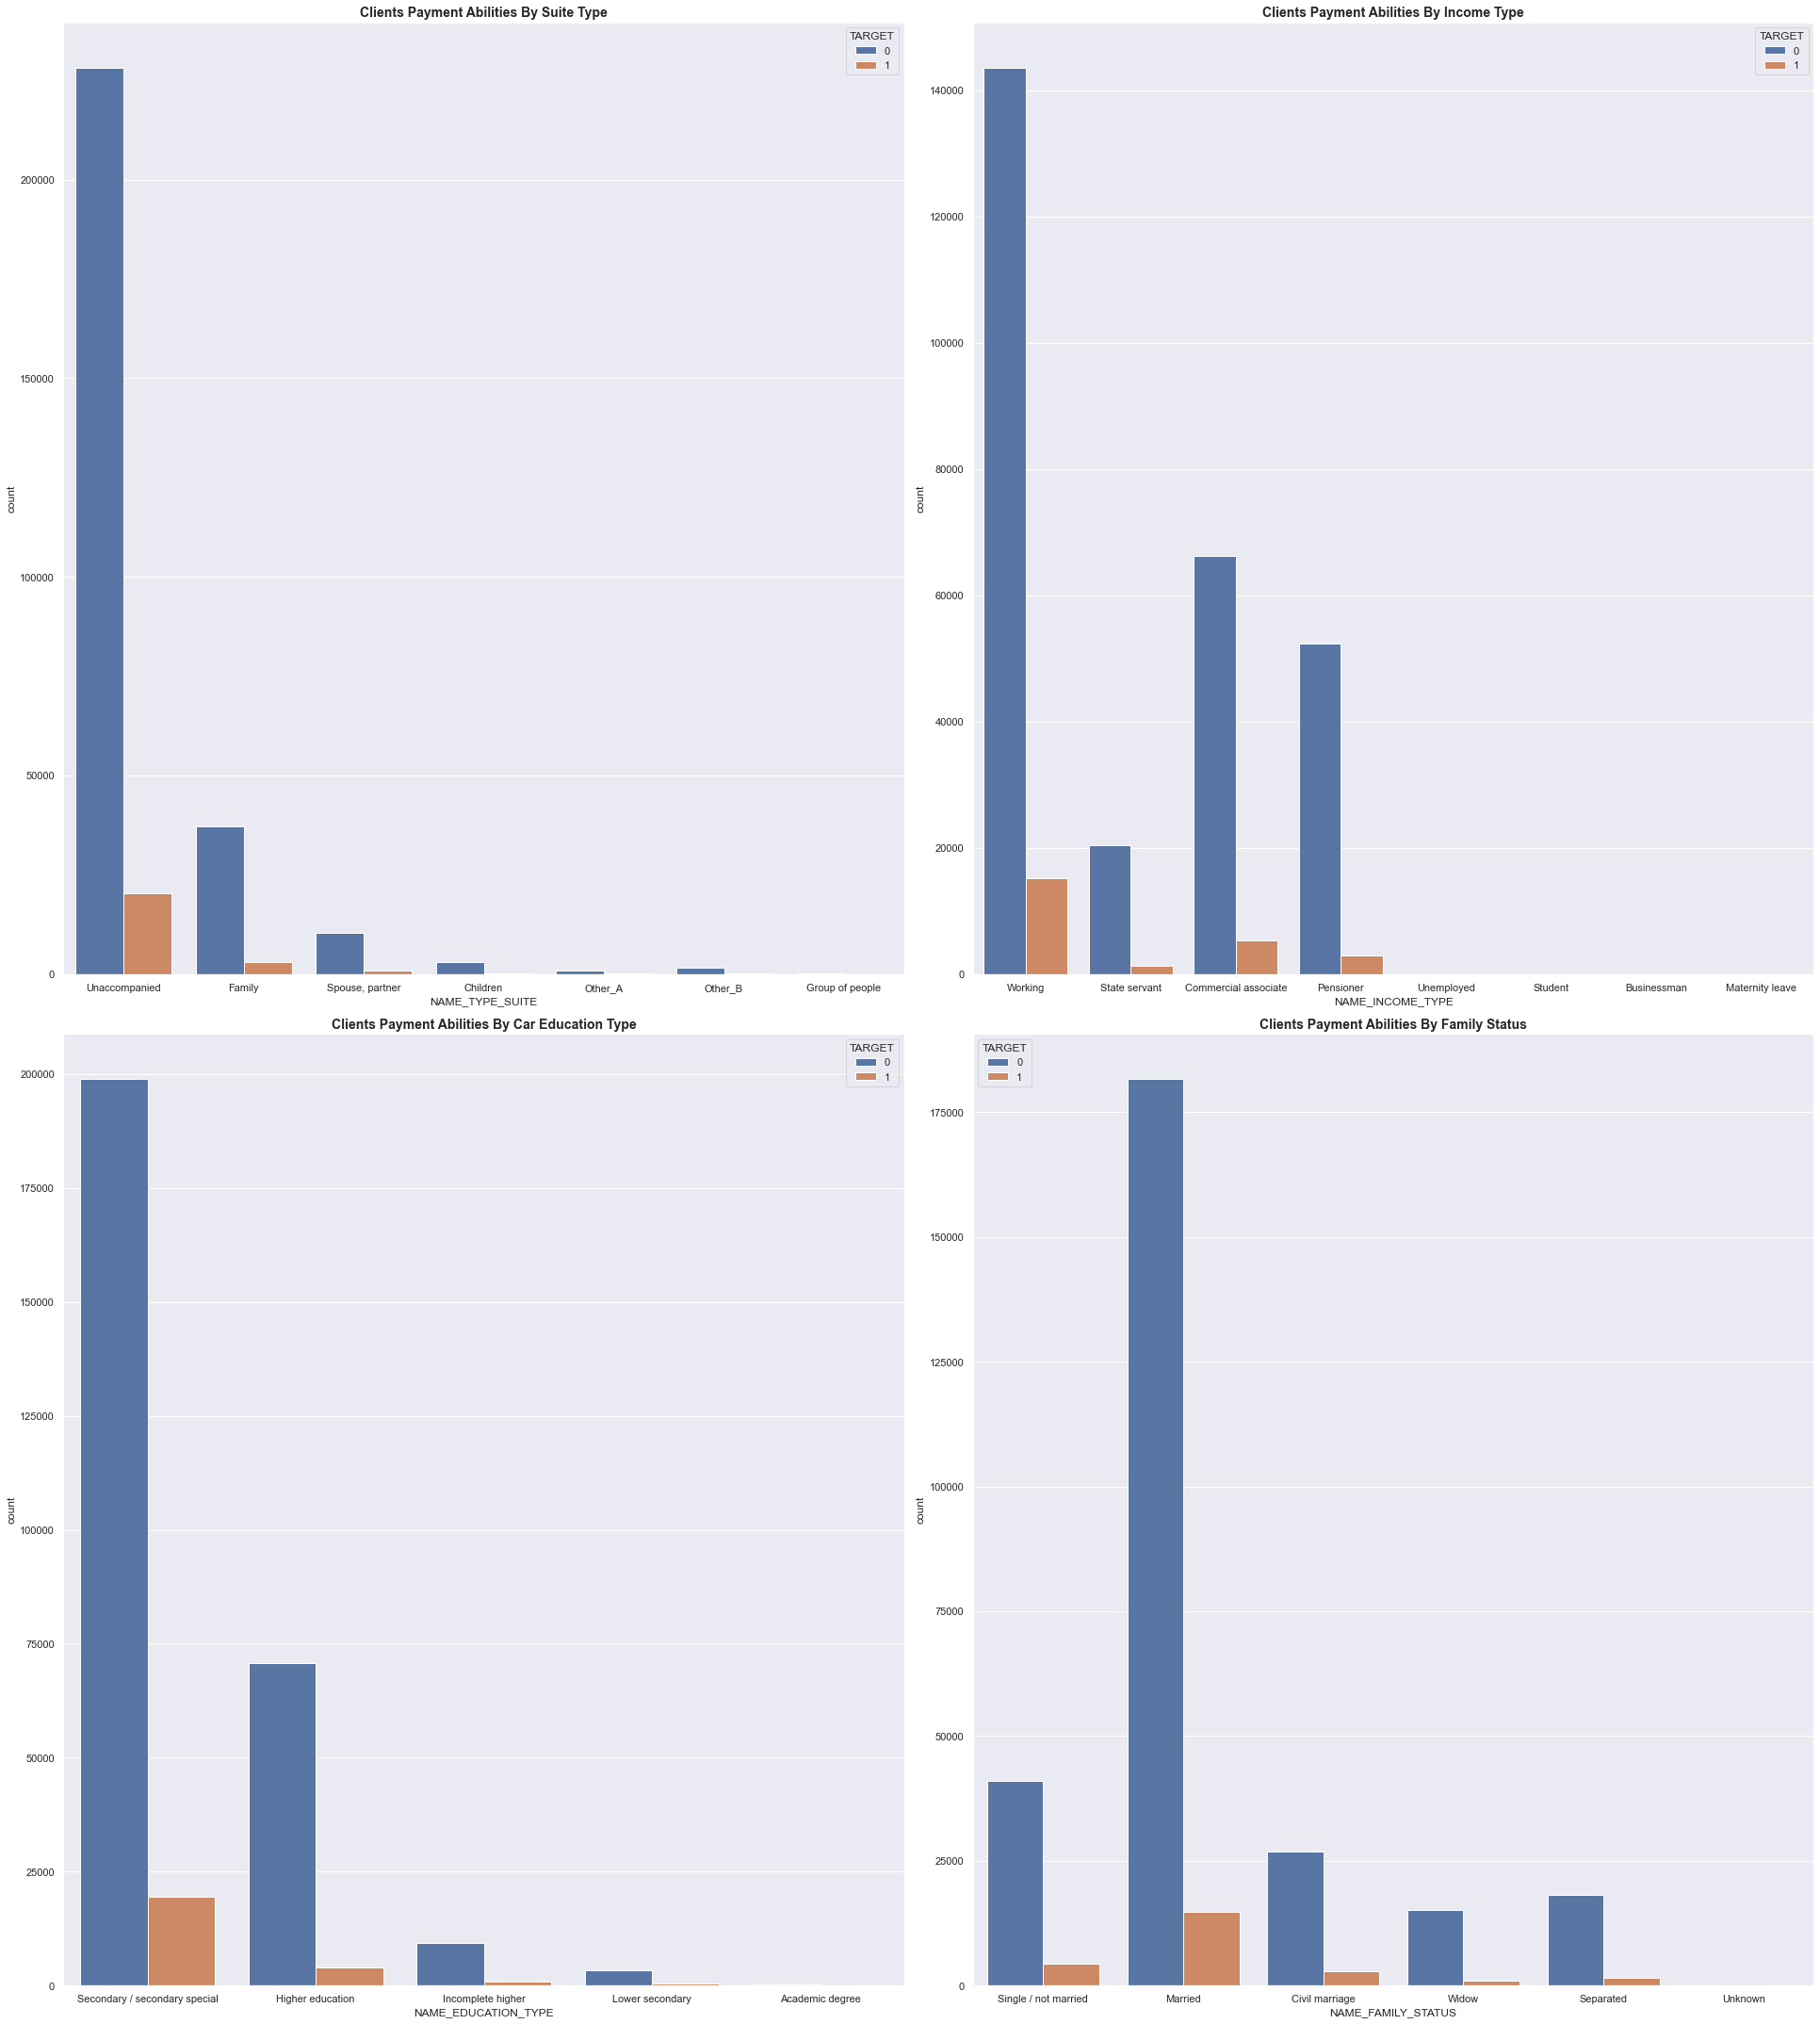

In [ ]:
sns.set(style='darkgrid')
fig, ax = plt.subplots(2,2, figsize=(27,30))

ax[0][0].set_title('Clients Payment Abilities By Suite Type', fontweight='bold', fontsize=14)
sns.countplot(data=df_train, x='NAME_TYPE_SUITE', hue='TARGET', ax=ax[0][0])

ax[0][1].set_title('Clients Payment Abilities By Income Type', fontweight='bold', fontsize=14)
sns.countplot(data=df_train, x='NAME_INCOME_TYPE', hue='TARGET', ax=ax[0][1])

ax[1][0].set_title('Clients Payment Abilities By Car Education Type', fontweight='bold', fontsize=14)
sns.countplot(data=df_train, x='NAME_EDUCATION_TYPE', hue='TARGET', ax=ax[1][0])

ax[1][1].set_title('Clients Payment Abilities By Family Status', fontweight='bold', fontsize=14)
sns.countplot(data=df_train, x='NAME_FAMILY_STATUS', hue='TARGET', ax=ax[1][1])

plt.tight_layout()
plt.show()

In [ ]:
pivot_loan(df_train,"NAME_TYPE_SUITE").sort_values('Difficulty_Rate',ascending=False)

,NAME_TYPE_SUITE,Having No Difficulties,Having Difficulties,total,Difficulty_Rate
4,Other_B,1596,174,1770,9.830508
3,Other_A,790,76,866,8.775982
2,Group of people,248,23,271,8.487085
6,Unaccompanied,228189,20337,248526,8.183047
5,"Spouse, partner",10475,895,11370,7.871592
1,Family,37140,3009,40149,7.494583
0,Children,3026,241,3267,7.376798


When our client is applying for loan most of them **Unaccompanied** around 248k client. In other side client who are accompanied by **Other_B** having more dificulty during repay the loans around 9.8%. Overall the difference is not too significant between type in suite.

In [ ]:
pivot_loan(df_train,"NAME_INCOME_TYPE").sort_values('Difficulty_Rate',ascending=False)

,NAME_INCOME_TYPE,Having No Difficulties,Having Difficulties,total,Difficulty_Rate
2,Maternity leave,3,2,5,40.000000
6,Unemployed,14,8,22,36.363636
7,Working,143550,15224,158774,9.588472
1,Commercial associate,66257,5360,71617,7.484257
4,State servant,20454,1249,21703,5.754965
3,Pensioner,52380,2982,55362,5.386366
0,Businessman,10,0,10,0.000000
5,Student,18,0,18,0.000000


We can see that most of our client income type comes from **Working** around 158k followed by **Commercial associate** 71k.

If you look closely the number of client in **Businessman, Maternity leave, Student, and Unemployed** only a few. To make sure our conclusion is valid, we won't take this segment as income type and only take the big one who are having more client in our Data.
Therefore Income type **Working** is having more problem during repay the loans around 9.58%.

In [ ]:
pivot_loan(df_train,"NAME_EDUCATION_TYPE").sort_values('Difficulty_Rate',ascending=False)

,NAME_EDUCATION_TYPE,Having No Difficulties,Having Difficulties,total,Difficulty_Rate
3,Lower secondary,3399,417,3816,10.927673
4,Secondary / secondary special,198867,19524,218391,8.939929
2,Incomplete higher,9405,872,10277,8.484966
1,Higher education,70854,4009,74863,5.355115
0,Academic degree,161,3,164,1.829268


Majority of our client having **Secondary / secondary special** education around 218k, followed by **Higher education** around 74k. 

Client who have **Lower secondary** education having the highest problem during repay the loans around 10.92%.

In [ ]:
pivot_loan(df_train,"NAME_FAMILY_STATUS").sort_values('Difficulty_Rate',ascending=False)

,NAME_FAMILY_STATUS,Having No Difficulties,Having Difficulties,total,Difficulty_Rate
0,Civil marriage,26814,2961,29775,9.944584
3,Single / not married,40987,4457,45444,9.807675
2,Separated,18150,1620,19770,8.194234
1,Married,181582,14850,196432,7.559868
5,Widow,15151,937,16088,5.824217
4,Unknown,2,0,2,0.000000


Our highest Client on applying loans have **Married** around 196k followed by **single** around 45k.

Client with family status **Civil Mariage and Single** have the highest problem in payment around 9%.

Housing Type, Day Process, Occupation, Organization, Region Rating Client

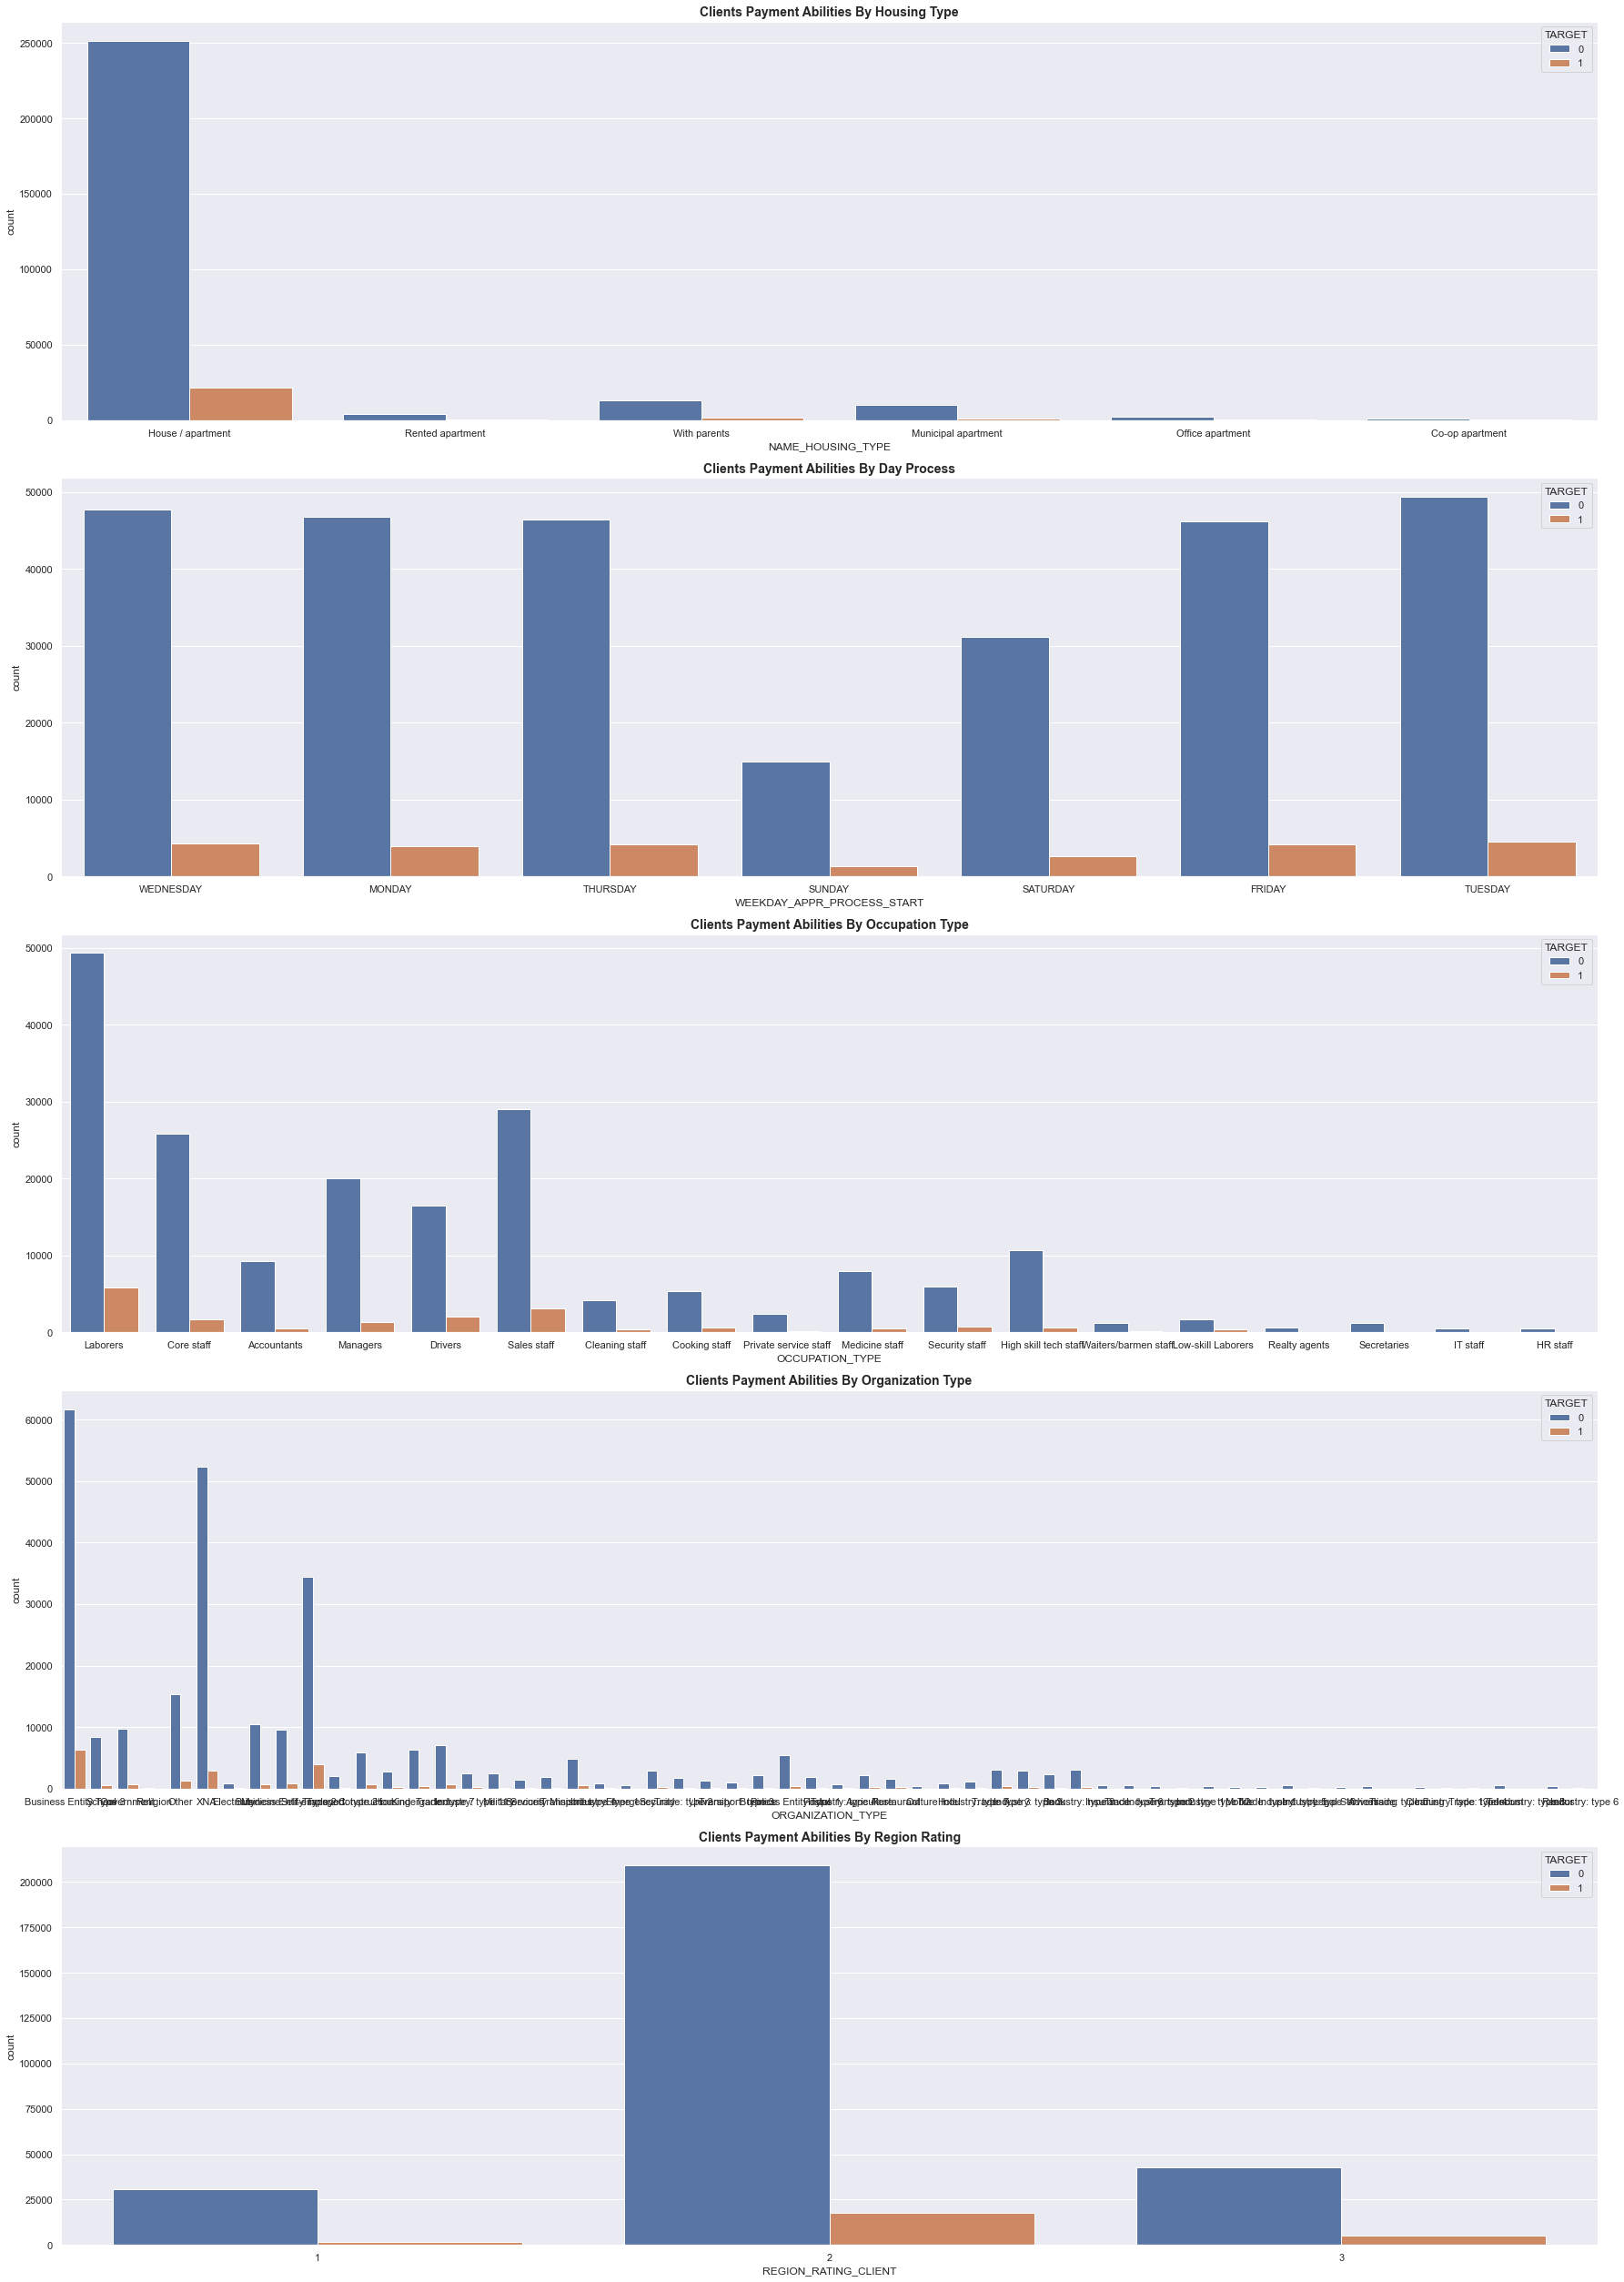

In [ ]:
sns.set(style='darkgrid')
fig, ax = plt.subplots(5, figsize=(25, 35))

ax[0].set_title('Clients Payment Abilities By Housing Type', fontweight='bold', fontsize=14)
sns.countplot(data=df_train, x='NAME_HOUSING_TYPE', hue='TARGET', ax=ax[0])

ax[1].set_title('Clients Payment Abilities By Day Process', fontweight='bold', fontsize=14)
sns.countplot(data=df_train, x='WEEKDAY_APPR_PROCESS_START', hue='TARGET', ax=ax[1])

ax[2].set_title('Clients Payment Abilities By Occupation Type', fontweight='bold', fontsize=14)
sns.countplot(data=df_train, x='OCCUPATION_TYPE', hue='TARGET', ax=ax[2])

ax[3].set_title('Clients Payment Abilities By Organization Type', fontweight='bold', fontsize=14)
sns.countplot(data=df_train, x='ORGANIZATION_TYPE', hue='TARGET', ax=ax[3])

ax[4].set_title('Clients Payment Abilities By Region Rating', fontweight='bold', fontsize=14)
sns.countplot(data=df_train, x='REGION_RATING_CLIENT', hue='TARGET', ax=ax[4])

plt.tight_layout()
plt.show()

In [ ]:
pivot_loan(df_train,"NAME_HOUSING_TYPE").sort_values('Difficulty_Rate',ascending=False)

,NAME_HOUSING_TYPE,Having No Difficulties,Having Difficulties,total,Difficulty_Rate
4,Rented apartment,4280,601,4881,12.313051
5,With parents,13104,1736,14840,11.698113
2,Municipal apartment,10228,955,11183,8.539748
0,Co-op apartment,1033,89,1122,7.932264
1,House / apartment,251596,21272,272868,7.795711
3,Office apartment,2445,172,2617,6.572411


Most of our client have their own **House/apartment** around 272k.

Client who **Rented apartement** have the highest difficulty during repay the loans around 12.3% followed by **With Parents** 11.69%

In [ ]:
pivot_loan(df_train,"WEEKDAY_APPR_PROCESS_START").sort_values('Difficulty_Rate',ascending=False)

,WEEKDAY_APPR_PROCESS_START,Having No Difficulties,Having Difficulties,total,Difficulty_Rate
5,TUESDAY,49400,4501,53901,8.350494
6,WEDNESDAY,47696,4238,51934,8.160357
0,FRIDAY,46237,4101,50338,8.146927
4,THURSDAY,46493,4098,50591,8.100255
3,SUNDAY,14898,1283,16181,7.929053
2,SATURDAY,31182,2670,33852,7.887274
1,MONDAY,46780,3934,50714,7.757227


Most of our client apply for loan in **Tuesday** around 53.9k. Overall The distribution of each day same for about 50kish. Based on the data every each day produce about 7-8 % the difficulty of having problem during repay the loans.

In [ ]:
pivot_loan(df_train,"OCCUPATION_TYPE").sort_values('Difficulty_Rate',ascending=False)

,OCCUPATION_TYPE,Having No Difficulties,Having Difficulties,total,Difficulty_Rate
9,Low-skill Laborers,1734,359,2093,17.152413
4,Drivers,16496,2107,18603,11.326130
17,Waiters/barmen staff,1196,152,1348,11.275964
16,Security staff,5999,722,6721,10.742449
8,Laborers,49348,5838,55186,10.578770
2,Cooking staff,5325,621,5946,10.443996
14,Sales staff,29010,3092,32102,9.631799
1,Cleaning staff,4206,447,4653,9.606705
13,Realty agents,692,59,751,7.856192
15,Secretaries,1213,92,1305,7.049808


Most of our client occupation is **Laborers** around 55k followed by **Sales Staff** around 32k.

**Low-skill Laborers** have the highest problem during repay the loans around 17.1%.

In [ ]:
pivot_loan(df_train,"ORGANIZATION_TYPE").sort_values('Difficulty_Rate',ascending=False)

,ORGANIZATION_TYPE,Having No Difficulties,Having Difficulties,total,Difficulty_Rate
54,Transport: type 3,1000,187,1187,15.754002
18,Industry: type 13,58,9,67,13.432836
25,Industry: type 8,21,3,24,12.500000
38,Restaurant,1599,212,1811,11.706240
7,Construction,5936,785,6721,11.679810
6,Cleaning,231,29,260,11.153846
14,Industry: type 1,924,115,1039,11.068335
20,Industry: type 3,2930,348,3278,10.616229
36,Realtor,354,42,396,10.606061
1,Agriculture,2197,257,2454,10.472698


Based on the data Organization Type of **Transport Type 3** have the highest problem in payment around 15.75%

In [ ]:
pivot_loan(df_train,"REGION_RATING_CLIENT").sort_values('Difficulty_Rate',ascending=False)

,REGION_RATING_CLIENT,Having No Difficulties,Having Difficulties,total,Difficulty_Rate
2,3,42964,5366,48330,11.102835
1,2,209077,17907,226984,7.889102
0,1,30645,1552,32197,4.820325


Most of our client lives in **Region 2** around 226k client.

Client who lives in **Region 3** have more problem during repay the loans around 11.1% meanwhile **Region 1** is the better region during repay the loans.

### Bivariate Analysis Numerical Data

Now we will analyze on numerical features

In [ ]:
df_train['age'] = (df_train['DAYS_BIRTH']/-365).round()
df_train['age'].head()

0    26.0
1    46.0
2    52.0
3    52.0
4    55.0
Name: age, dtype: float64

In [ ]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,age
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
df_train['age'].value_counts()

39.0    9023
38.0    8793
37.0    8727
40.0    8602
41.0    8495
28.0    8467
32.0    8313
42.0    8308
43.0    8265
36.0    8152
44.0    8132
31.0    8021
30.0    7776
35.0    7751
33.0    7729
34.0    7659
29.0    7636
54.0    7489
45.0    7385
46.0    7333
47.0    7202
55.0    7140
53.0    7124
57.0    6926
48.0    6907
49.0    6786
52.0    6740
50.0    6696
56.0    6657
60.0    6612
59.0    6479
51.0    6417
27.0    6413
58.0    6371
61.0    5795
63.0    5467
62.0    5362
64.0    5023
26.0    4364
65.0    4318
25.0    4079
24.0    3815
23.0    3669
66.0    2641
22.0    1990
67.0    1834
68.0    1654
21.0     660
69.0     314
Name: age, dtype: int64

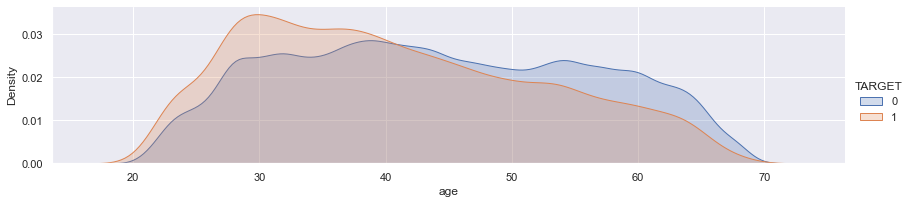

<AxesSubplot:xlabel='age', ylabel='Count'>

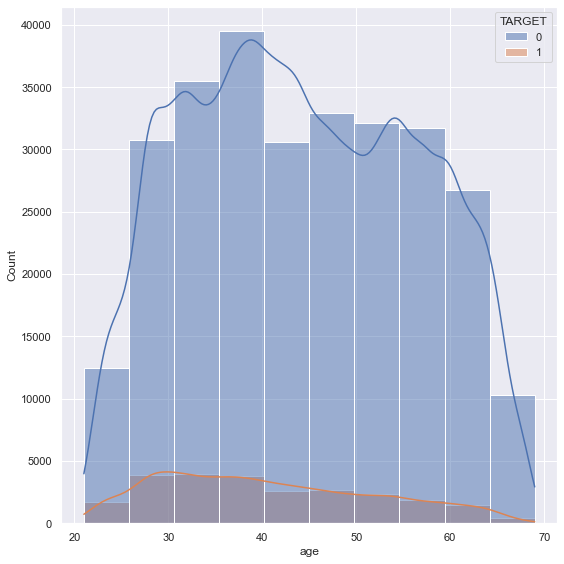

In [ ]:
facet = sns.FacetGrid(df_train, hue = 'TARGET', aspect = 4)
facet.map(sns.kdeplot, "age", shade= True)
facet.add_legend()
plt.show()

plt.rcParams["figure.figsize"] = [8,8]
plt.rcParams["figure.autolayout"] = True
sns.histplot(data = df_train, x = "age", kde = True, hue = "TARGET", bins=10)

I will split the range of age to 3 categories:
1. Young = lower than 40
2. Middle = between 40-60
3. Old = higher 60

In [ ]:
def age_group(age):
  if age < 40:
    return "Young"
  elif age > 60:
    return "Old"
  else:
    return "Middle"
  
df_train['age_group'] = df_train['age'].apply(lambda age: age_group(age))

In [ ]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,age,age_group
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,Young
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,Middle
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
pivot_loan(df_train,"age_group")

,age_group,Having No Difficulties,Having Difficulties,total,Difficulty_Rate
0,Middle,141517,10549,152066,6.937119
1,Old,30812,1596,32408,4.924710
2,Young,110357,12680,123037,10.305843


After spliting, we can take the big picture of age group in our client. **Middle** age who are 40-60 y.o dominated around 152k client.
Client in age group **Young** have more problem during repay the loans around 10.3%.

In [ ]:
df_train['CNT_CHILDREN'].value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

I will split count children into 2 categories :
1. Yes = Have child
2. No = Have no child

In [ ]:
def having_child(n):
  if n >= 1:
    return 'yes'
  else:
    return 'no'
  
df_train['having_child'] = df_train['CNT_CHILDREN'].apply(lambda n: having_child(n))

In [ ]:
pivot_loan(df_train,"having_child")

,having_child,Having No Difficulties,Having Difficulties,total,Difficulty_Rate
0,no,198762,16609,215371,7.711809
1,yes,83924,8216,92140,8.916866


Most of our client **have child** around 215k client. 
Client with **have no child** have more problem during repay the loans even the difference is not too significant.

## Multivariate Analysis

1. Car Ownership Status, Income Total, Realty/House Ownership Status

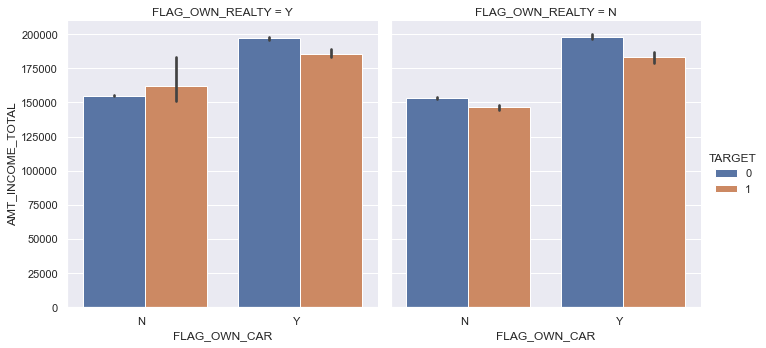

In [ ]:
fig = sns.catplot(x = 'FLAG_OWN_CAR',
            y = 'AMT_INCOME_TOTAL', 
            hue = 'TARGET', 
            col = 'FLAG_OWN_REALTY', 
            kind = 'bar',
            data = df_train)

fig.set_xticklabels(horizontalalignment='right')
plt.show()

As you can see, client **who own a car and Realty/House** have higher problem during repay the loans because of their lifestyle must be higher rather than client who **have no own House/Flat** 

2. Income type, Amount of Credit, and House/Flat Ownership Status

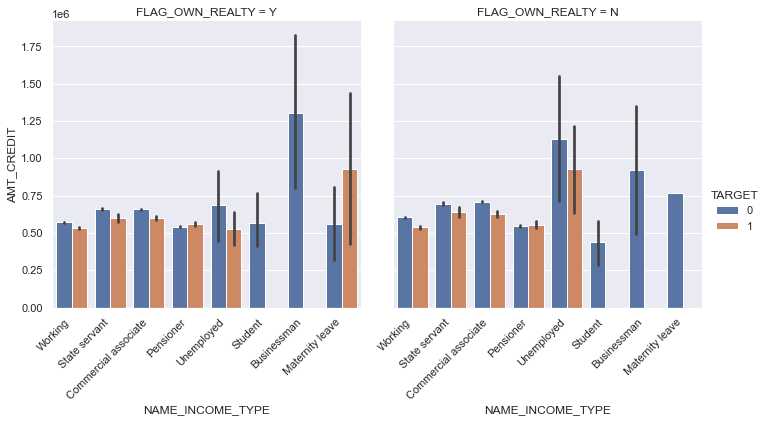

In [ ]:
fig = sns.catplot(x = 'NAME_INCOME_TYPE',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'FLAG_OWN_REALTY', 
            kind = 'bar', 
            data = df_train)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Client with income type **Maternity leave and own a house/flat** have a problem during repaying the loans compared to **not own a house/flat**. But if you look closely above in Bivariate Analysis we have already known that the number of Maternity leave is so low in our Data. The interesting part in this chart **Unemployed** with **have no own house/flat** having higher credit rather than **have own house/flat**. They also have problem more higher during repay loans.

3. Income Type, Amount of Credit, Name Contact Type

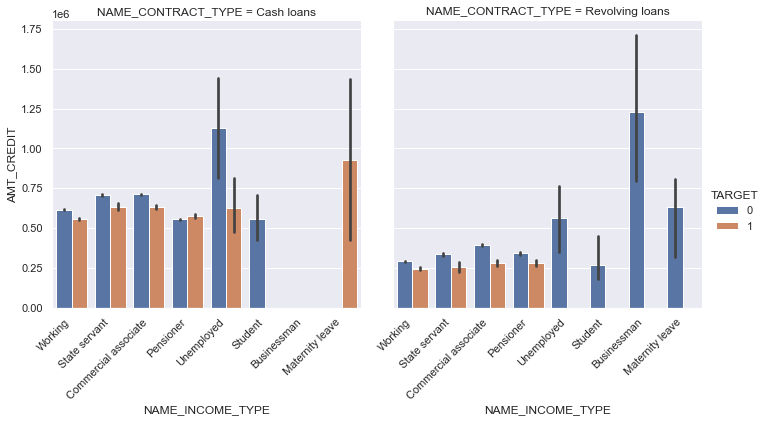

In [ ]:
fig = sns.catplot(x = 'NAME_INCOME_TYPE',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'NAME_CONTRACT_TYPE', 
            kind = 'bar',
            data = df_train)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

All Client with income type **Maternity leave** and contract type **Cash loans** have problem repaying loans for medium credit arround 1mil while all client with same income type but contract type **Revolving loans** have no difficulty repaying loans. Remember this is only for a few of data back then.

For income type **Unemployed** from chart above we can see around 50% of client who applying **Cash loans** have problem repaying the loan while all client with same income type but contract type **Revolving loans** have no difficulty repaying loans.

For income type **Student** either contract type **Cash loans** or **Revolving loans** all client have no problem repaying loans and No Businessman apply loans in contract type **Cash loans**. But look again those type only have a few of data.

4. Education Type, Amount of Credit, Region Rating Client

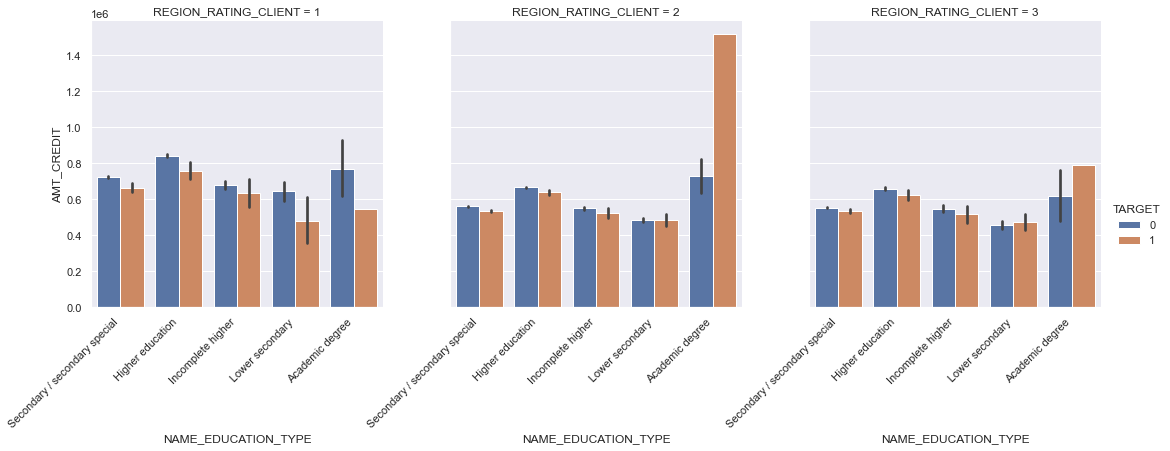

In [ ]:
fig = sns.catplot(x = 'NAME_EDUCATION_TYPE',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'REGION_RATING_CLIENT', 
            kind = 'bar', 
            data = df_train)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

As you know before, Region 2 is majority our client lives. 

Client who lives in **Region 2** and education **Academic degree** have more problem in repaying loans with high credit about 1.5 mil. Somehow lifetyle in Region 2 is higher for the **Academic degree** probably this region having reputable university with high cost.

5. Income Type, Amount of Credit, Region Rating Client

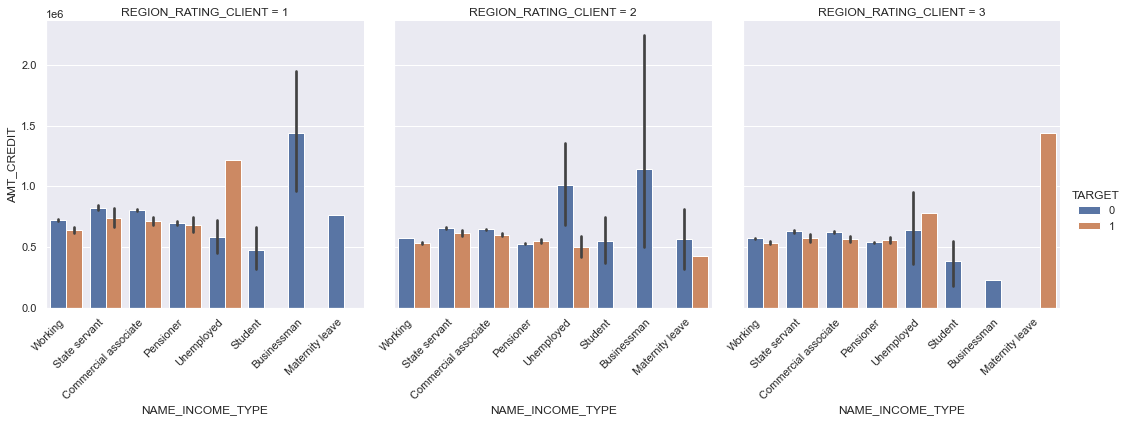

In [ ]:
fig = sns.catplot(x = 'NAME_INCOME_TYPE',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'REGION_RATING_CLIENT', 
            kind = 'bar', 
            data = df_train)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Client who lives in **Region 1** and income type **Unemployed** have more problem in repaying the loans rather than in region 2 and 3. Probably region 1 need high cost to live and **Unemployed** don't have enough income to pay.

Based on Bivariate and Multivariate Analysis above, we can conclude the type of client who is having difficulty on payment :

1. Gender = Man
2. Contract Type = Cash loans
3. Not Own Car
4. Not Own House/Flat
5. Suite Type = Other_B
6. Income type = Working
7. Education = Lower Secondary 
8. Family Status = Civil Mariage
9. House Type = Rented Apartment or With Parents
10. Occupation Type = Low-skill Laborers
11. Region Rating Client = Region 3
12. Age group = Young
13. Having children
14. Unemployed who have no own House/Flat
15. Unemployed who applied on Csh loans
16. Academic degree who lives in Region 2
17. Unemployed who lives in Region 1


# Data Cleaning

## Check duplicated

In [ ]:
df_train[df_train['SK_ID_CURR'].duplicated()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,age,age_group,having_child


No duplicated found in DataFrame

## Check Missing Values and Data Types

I will create Function to show name of columns, DataType, null values, null percentage, and number of unique in each columns

In [ ]:
def check_values(df):
  data=[]
  for col in df.columns:
    data.append([col,\
                 df[col].dtype,\
                 df[col].isna().sum(),\
                 round(100*(df[col].isnull().sum()/len(df)),2),\
                 df[col].nunique()
                ])
  return pd.DataFrame(columns=['dataFeatures','dataType','null','nullPct','nunique'], data=data)

In [ ]:
check_values(df_train).sort_values('nullPct',ascending=False).reset_index(drop=True)

,dataFeatures,dataType,null,nullPct,nunique
0,COMMONAREA_MODE,float64,214865,69.87,3128
1,COMMONAREA_AVG,float64,214865,69.87,3181
2,COMMONAREA_MEDI,float64,214865,69.87,3202
3,NONLIVINGAPARTMENTS_MEDI,float64,213514,69.43,214
4,NONLIVINGAPARTMENTS_MODE,float64,213514,69.43,167
5,NONLIVINGAPARTMENTS_AVG,float64,213514,69.43,386
6,FONDKAPREMONT_MODE,object,210295,68.39,4
7,LIVINGAPARTMENTS_AVG,float64,210199,68.35,1868
8,LIVINGAPARTMENTS_MEDI,float64,210199,68.35,1097
9,LIVINGAPARTMENTS_MODE,float64,210199,68.35,736


We will drop columns with missing values about 50%

In [ ]:
df_train.drop(df_train.iloc[:, 44:91], inplace=True, axis=1)
df_train.drop(['OWN_CAR_AGE','EXT_SOURCE_1'], inplace=True, axis=1)

Check missing values again

In [ ]:
check_values(df_train).sort_values('nullPct',ascending=False).reset_index(drop=True)

,dataFeatures,dataType,null,nullPct,nunique
0,OCCUPATION_TYPE,object,96391,31.35,18
1,EXT_SOURCE_3,float64,60965,19.83,814
2,AMT_REQ_CREDIT_BUREAU_YEAR,float64,41519,13.50,25
3,AMT_REQ_CREDIT_BUREAU_QRT,float64,41519,13.50,11
4,AMT_REQ_CREDIT_BUREAU_MON,float64,41519,13.50,24
5,AMT_REQ_CREDIT_BUREAU_WEEK,float64,41519,13.50,9
6,AMT_REQ_CREDIT_BUREAU_DAY,float64,41519,13.50,9
7,AMT_REQ_CREDIT_BUREAU_HOUR,float64,41519,13.50,5
8,NAME_TYPE_SUITE,object,1292,0.42,7
9,DEF_60_CNT_SOCIAL_CIRCLE,float64,1021,0.33,9


As you can see we have more than 10  numerical features that have missing values. On this section, i will split in some parts to see how distribution of this data.

## Distibution of numerical feature

**Distribution of numerical feature Part 1**

<AxesSubplot:xlabel='AMT_REQ_CREDIT_BUREAU_DAY', ylabel='Density'>

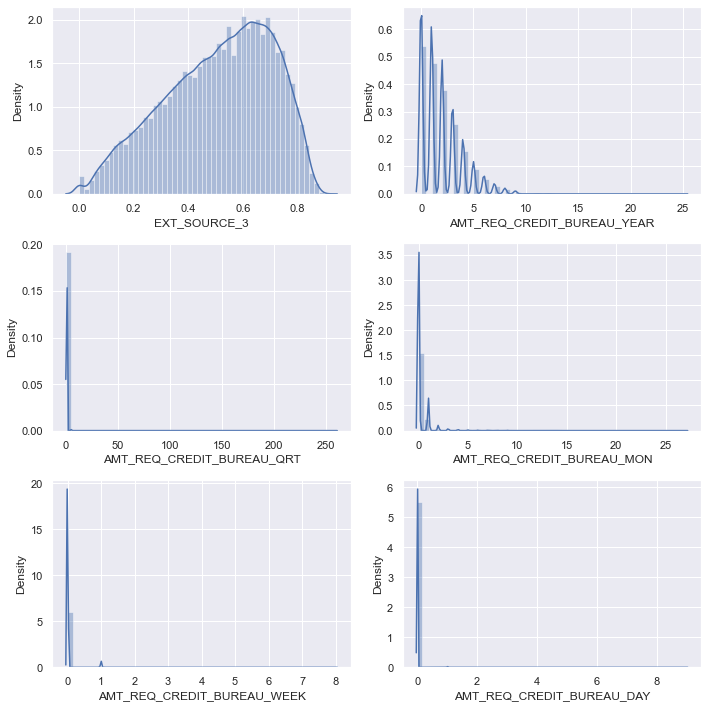

In [ ]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(3,2, figsize=(10,10))

sns.distplot(df_train['EXT_SOURCE_3'], ax=ax[0][0])

sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_YEAR'], ax=ax[0][1])

sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_QRT'], ax=ax[1][0])

sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_MON'], ax=ax[1][1])

sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_WEEK'], ax=ax[2][0])

sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_DAY'], ax=ax[2][1])


**Distribution of numerical feature Part 2**

<AxesSubplot:xlabel='EXT_SOURCE_2', ylabel='Density'>

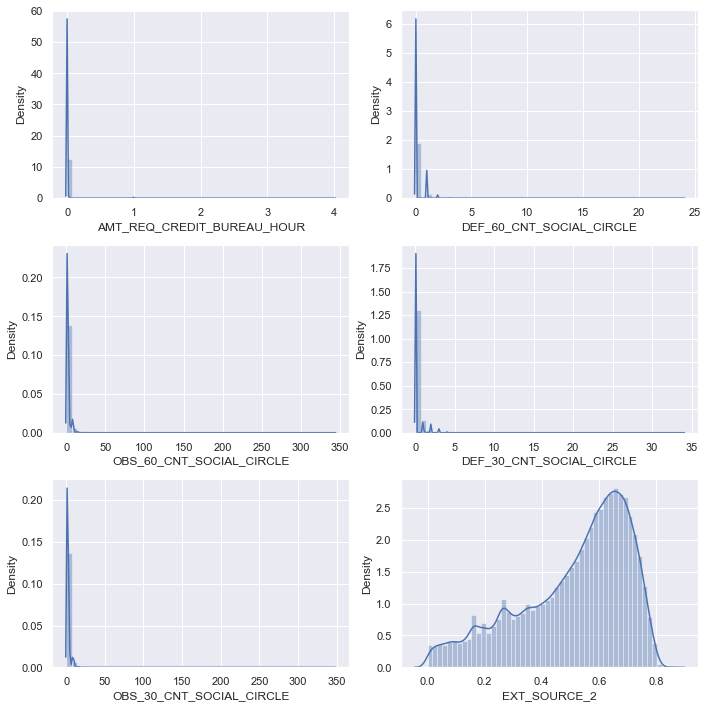

In [ ]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(3,2, figsize=(10,10))

sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_HOUR'], ax=ax[0][0])

sns.distplot(df_train['DEF_60_CNT_SOCIAL_CIRCLE'], ax=ax[0][1])

sns.distplot(df_train['OBS_60_CNT_SOCIAL_CIRCLE'], ax=ax[1][0])

sns.distplot(df_train['DEF_30_CNT_SOCIAL_CIRCLE'], ax=ax[1][1])

sns.distplot(df_train['OBS_30_CNT_SOCIAL_CIRCLE'], ax=ax[2][0])

sns.distplot(df_train['EXT_SOURCE_2'], ax=ax[2][1])

**Distribution of numerical feature Part 3**

<AxesSubplot:xlabel='CNT_FAM_MEMBERS', ylabel='Density'>

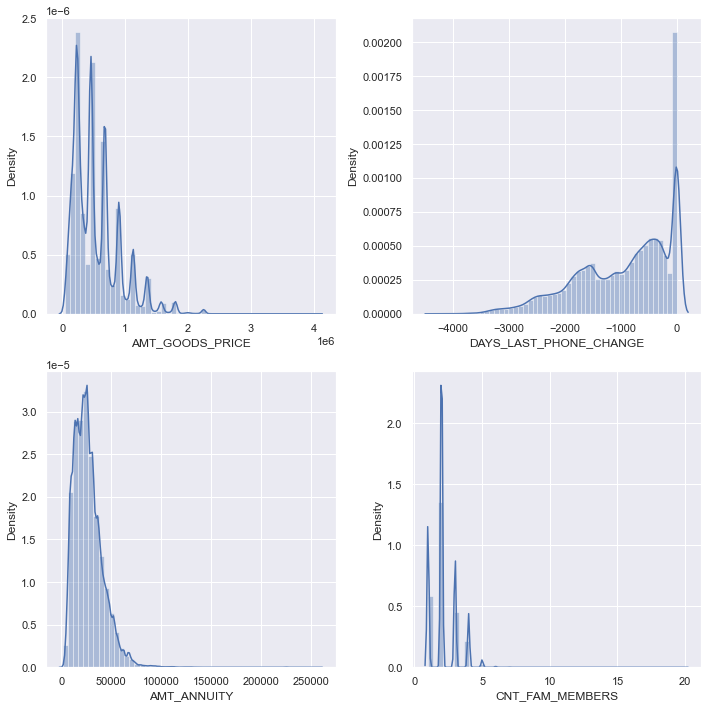

In [ ]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(2,2, figsize=(10,10))

sns.distplot(df_train['AMT_GOODS_PRICE'], ax=ax[0][0])

sns.distplot(df_train['DAYS_LAST_PHONE_CHANGE'], ax=ax[0][1])

sns.distplot(df_train['AMT_ANNUITY'], ax=ax[1][0])

sns.distplot(df_train['CNT_FAM_MEMBERS'], ax=ax[1][1])


Based on the distribution of numerical features we can see the data is skewed either left or right. Using this information we can impute missing value with median instead of mean. 

We will impute missing value of numerical features with median and categorical features with mode

In [ ]:
category_columns = df_train.select_dtypes(include=['object'])
numeric_columns = df_train.select_dtypes(include=['int64','float64'])

for column in df_train:
    if df_train[column].isnull().any():
        if(column in category_columns):
            df_train[column]=df_train[column].fillna(df_train[column].mode()[0])
        else:
            df_train[column]=df_train[column].fillna(df_train[column].median())

After that we can check the result after imputation to make sure now our DataFrame is clear of any missing value in each rows

In [ ]:
# df_train.DAYS_EMPLOYED.value_counts()

In [ ]:
check_values(df_train).sort_values('nullPct',ascending=False).reset_index(drop=True)

,dataFeatures,dataType,null,nullPct,nunique
0,SK_ID_CURR,int64,0,0.0,307511
1,FLAG_DOCUMENT_3,int64,0,0.0,2
2,FLAG_DOCUMENT_10,int64,0,0.0,2
3,FLAG_DOCUMENT_9,int64,0,0.0,2
4,FLAG_DOCUMENT_8,int64,0,0.0,2
5,FLAG_DOCUMENT_7,int64,0,0.0,2
6,FLAG_DOCUMENT_6,int64,0,0.0,2
7,FLAG_DOCUMENT_5,int64,0,0.0,2
8,FLAG_DOCUMENT_4,int64,0,0.0,2
9,FLAG_DOCUMENT_2,int64,0,0.0,2


Now our DataFrame already clear we can go to the next step

## Outlier

Before we handle Outlier, we will change the negative number of some columns to absolute number

In [ ]:
df_train.loc[:,'DAYS_BIRTH':'DAYS_ID_PUBLISH'] = df_train.loc[:,'DAYS_BIRTH':'DAYS_ID_PUBLISH'].abs()
df_train.loc[:,'DAYS_LAST_PHONE_CHANGE'] = df_train.loc[:,'DAYS_LAST_PHONE_CHANGE'] .abs()
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,age,age_group,having_child
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,Young,no
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,Middle,no
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,Middle,no
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,52.0,Middle,no
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,Middle,no


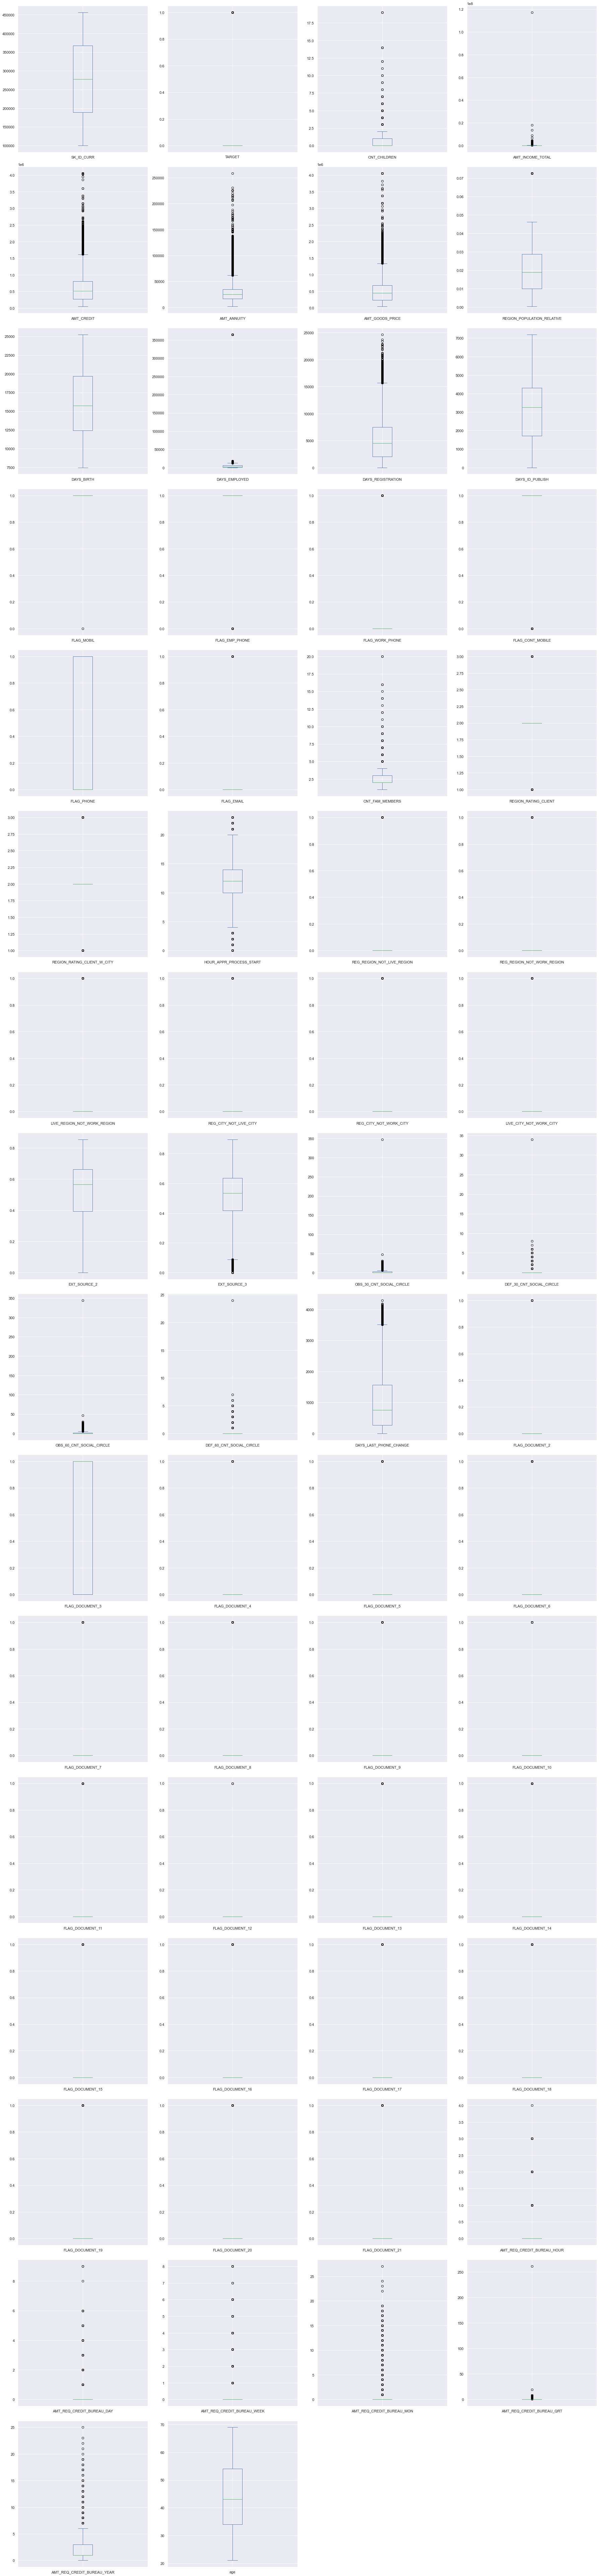

In [ ]:
df_train.plot(kind = 'box', subplots=True, figsize=(25,200), layout = (30,4))
plt.show()

As you can see from boxplot above there are outliers in each of columns located in either above or below. 

We only focused on handling outlier in terms of loan such as income, credit, annuity and goods price and keep the rest.

In [ ]:
sample = df_train[df_train.columns[df_train.columns.isin(['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE'])]]
sample.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
0,202500.0,406597.5,24700.5,351000.0
1,270000.0,1293502.5,35698.5,1129500.0
2,67500.0,135000.0,6750.0,135000.0
3,135000.0,312682.5,29686.5,297000.0
4,121500.0,513000.0,21865.5,513000.0


In [ ]:
keep = df_train[df_train.columns[~df_train.columns.isin(['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE'])]]
keep.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,age,age_group,having_child
0,100002,1,Cash loans,M,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,Young,no
1,100003,0,Cash loans,F,N,N,0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,Middle,no
2,100004,0,Revolving loans,M,Y,Y,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,Middle,no
3,100006,0,Cash loans,F,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,52.0,Middle,no
4,100007,0,Cash loans,M,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,Middle,no


In [ ]:
sample.describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
count,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05
mean,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05
std,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05
min,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04
25%,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05
50%,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05
75%,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06


We won't drop any data which contains outliers but masking them with some value either maximum value if outlier is above or minimum value if outlier is below.

In [ ]:
# Handling Outlier
Q1 = (sample[sample.columns]).quantile(0.25)
Q3 = (sample[sample.columns]).quantile(0.75)
IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('Maximum value in each variable : ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nMinimum value in each variable: ')
print(minimum)
more_than = (sample > maximum)
lower_than = (sample < minimum)

sample = sample.mask(more_than, maximum, axis=1) 
sample = sample.mask(lower_than, minimum, axis=1) 

print('\nAfter Handling Outlier: ')
print(sample.describe())

Maximum value in each variable : 
AMT_INCOME_TOTAL     337500.0
AMT_CREDIT          1616625.0
AMT_ANNUITY           61704.0
AMT_GOODS_PRICE     1341000.0
dtype: float64

Minimum value in each variable: 
AMT_INCOME_TOTAL    -22500.0
AMT_CREDIT         -537975.0
AMT_ANNUITY         -10584.0
AMT_GOODS_PRICE    -423000.0
dtype: float64

After Handling Outlier: 
       AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE
count     307511.000000  3.075110e+05  307511.000000     3.075110e+05
mean      162626.947877  5.923130e+05   26797.657150     5.278553e+05
std        73303.150927  3.803162e+05   13281.285661     3.370104e+05
min        25650.000000  4.500000e+04    1615.500000     4.050000e+04
25%       112500.000000  2.700000e+05   16524.000000     2.385000e+05
50%       147150.000000  5.135310e+05   24903.000000     4.500000e+05
75%       202500.000000  8.086500e+05   34596.000000     6.795000e+05
max       337500.000000  1.616625e+06   61704.000000     1.341000e+06


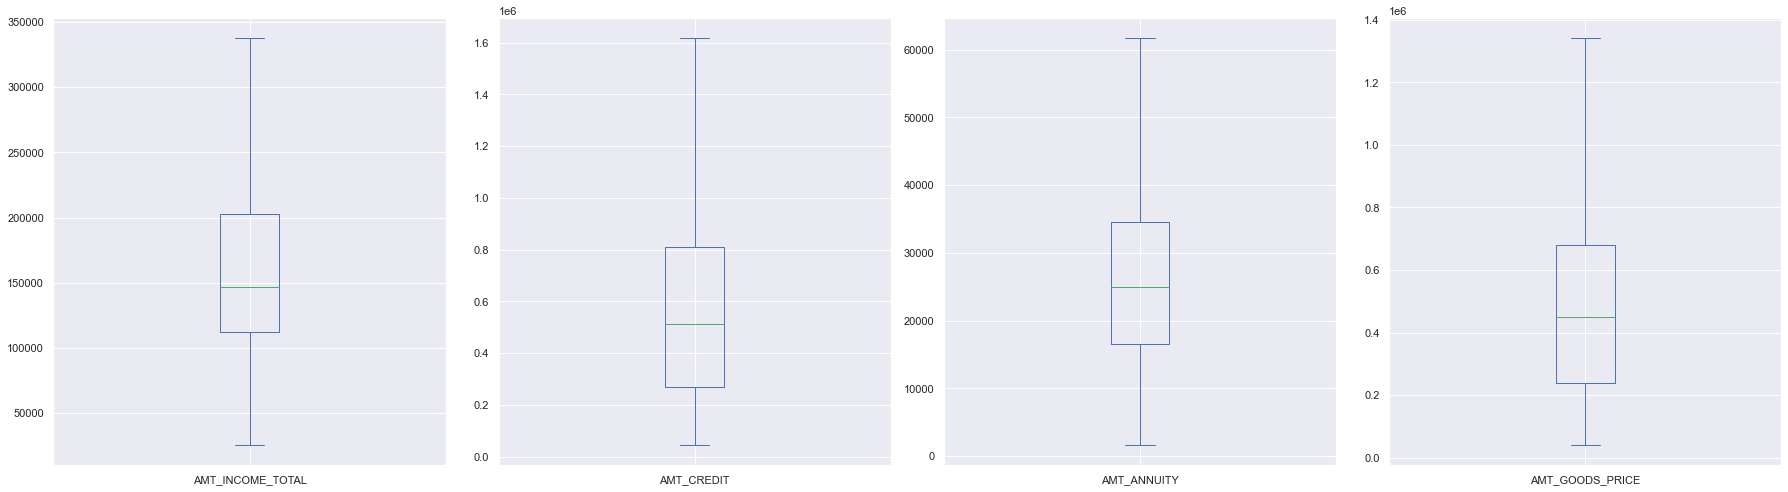

In [ ]:
sample.plot(kind = 'box', subplots=True, figsize=(25,200), layout = (30,4))
plt.show()

Now the outliers have been successfully masked into our DataFrame

In [ ]:
sample.describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
count,307511.000000,3.075110e+05,307511.000000,3.075110e+05
mean,162626.947877,5.923130e+05,26797.657150,5.278553e+05
std,73303.150927,3.803162e+05,13281.285661,3.370104e+05
min,25650.000000,4.500000e+04,1615.500000,4.050000e+04
25%,112500.000000,2.700000e+05,16524.000000,2.385000e+05
50%,147150.000000,5.135310e+05,24903.000000,4.500000e+05
75%,202500.000000,8.086500e+05,34596.000000,6.795000e+05
max,337500.000000,1.616625e+06,61704.000000,1.341000e+06


After that we concat **sample** and **keep** to our DataFrame

In [ ]:
df_train = pd.concat([sample,keep], axis=1)
df_train.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,age,age_group,having_child
0,202500.0,406597.5,24700.5,351000.0,100002,1,Cash loans,M,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,Young,no
1,270000.0,1293502.5,35698.5,1129500.0,100003,0,Cash loans,F,N,N,0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,Middle,no
2,67500.0,135000.0,6750.0,135000.0,100004,0,Revolving loans,M,Y,Y,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,Middle,no
3,135000.0,312682.5,29686.5,297000.0,100006,0,Cash loans,F,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,52.0,Middle,no
4,121500.0,513000.0,21865.5,513000.0,100007,0,Cash loans,M,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,Middle,no


In [ ]:
category_columns.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'age_group',
       'having_child'],
      dtype='object')

# Label Encoder

We should change categories feature into numerical feature before we move to Machine Learning. Eventhough in real case we need One hot encode to encode ordinal data but on this project we only used Label Encoder to simplify it.

In [ ]:
LE = LabelEncoder()
df_train[['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'age_group',
       'having_child']]  = df_train[['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'age_group',
       'having_child']].apply(LE.fit_transform)

In [ ]:
df_train.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,age,age_group,having_child
0,202500.0,406597.5,24700.5,351000.0,100002,1,0,1,0,1,0,6,7,4,3,1,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,8,1.0,2,2,6,10,0,0,0,0,0,0,5,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,2,0
1,270000.0,1293502.5,35698.5,1129500.0,100003,0,0,0,0,0,0,1,4,1,1,1,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,3,2.0,1,1,1,11,0,0,0,0,0,0,39,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,0,0
2,67500.0,135000.0,6750.0,135000.0,100004,0,1,1,1,1,0,6,7,4,3,1,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,8,1.0,2,2,1,9,0,0,0,0,0,0,11,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0,0
3,135000.0,312682.5,29686.5,297000.0,100006,0,0,0,0,1,0,6,7,4,0,1,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,8,2.0,2,2,6,17,0,0,0,0,0,0,5,0.650442,0.535276,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,52.0,0,0
4,121500.0,513000.0,21865.5,513000.0,100007,0,0,1,0,1,0,6,7,4,3,1,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,3,1.0,2,2,4,11,0,0,0,0,1,1,37,0.322738,0.535276,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,0,0


In [ ]:
check_values(df_train).sort_values('nunique',ascending=False).reset_index(drop=True)

,dataFeatures,dataType,null,nullPct,nunique
0,SK_ID_CURR,int64,0,0.0,307511
1,EXT_SOURCE_2,float64,0,0.0,119831
2,DAYS_BIRTH,int64,0,0.0,17460
3,DAYS_REGISTRATION,float64,0,0.0,15688
4,DAYS_EMPLOYED,int64,0,0.0,12574
5,AMT_ANNUITY,float64,0,0.0,11674
6,DAYS_ID_PUBLISH,int64,0,0.0,6168
7,AMT_CREDIT,float64,0,0.0,4969
8,DAYS_LAST_PHONE_CHANGE,float64,0,0.0,3773
9,AMT_INCOME_TOTAL,float64,0,0.0,2210


Now all of our columns already in numerical features

**Drop unnecessary Column**

In this step we will drop unnecessary Column including column with large of unique number and column that we created before like age, age_group, and having child

In [ ]:
df_train.drop(['SK_ID_CURR','EXT_SOURCE_2','age','age_group','having_child'], inplace=True, axis=1)

In [ ]:
df_train.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,202500.0,406597.5,24700.5,351000.0,1,0,1,0,1,0,6,7,4,3,1,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,8,1.0,2,2,6,10,0,0,0,0,0,0,5,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,270000.0,1293502.5,35698.5,1129500.0,0,0,0,0,0,0,1,4,1,1,1,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,3,2.0,1,1,1,11,0,0,0,0,0,0,39,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,67500.0,135000.0,6750.0,135000.0,0,1,1,1,1,0,6,7,4,3,1,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,8,1.0,2,2,1,9,0,0,0,0,0,0,11,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,135000.0,312682.5,29686.5,297000.0,0,0,0,0,1,0,6,7,4,0,1,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,8,2.0,2,2,6,17,0,0,0,0,0,0,5,0.535276,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,121500.0,513000.0,21865.5,513000.0,0,0,1,0,1,0,6,7,4,3,1,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,3,1.0,2,2,4,11,0,0,0,0,1,1,37,0.535276,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_train.shape

(307511, 71)

# Data Imbalance

We already know that our DataFrame is imbalance. On this step we will handle it with upper sampling minority target

In [ ]:
# create two different dataframe of majority and minority class 
df_majority = df_train[(df_train['TARGET']==0)] 
df_minority = df_train[(df_train['TARGET']==1)] 

# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 282686, # to match majority class (Target=0)
                                 random_state=30)  

# combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

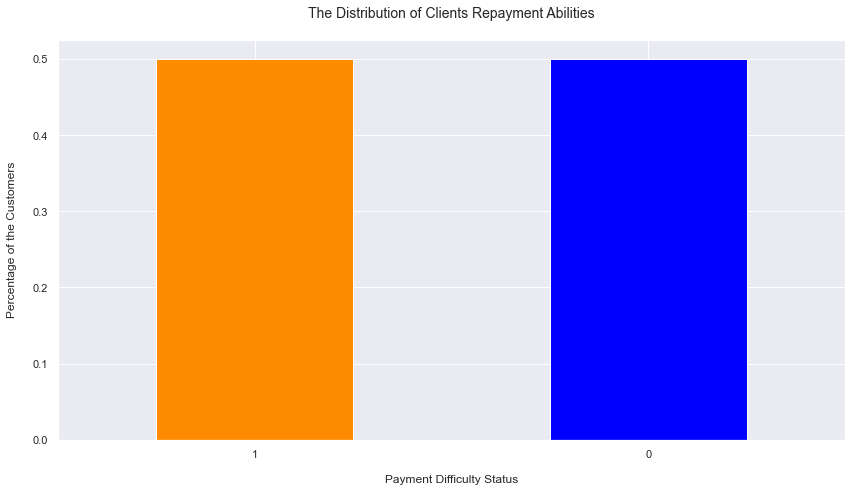

In [ ]:
fig = plt.figure(figsize = (12,7))

df_upsampled['TARGET'].value_counts(normalize=True).plot(kind='bar', color= ['darkorange','blue'], rot=0)

plt.title('The Distribution of Clients Repayment Abilities\n', fontsize=14)
plt.ylabel('Percentage of the Customers\n', fontsize=12)
plt.xlabel('\nPayment Difficulty Status', fontsize=12)
plt.show()

In [ ]:
df_upsampled.TARGET.value_counts()

1    282686
0    282686
Name: TARGET, dtype: int64

Now all of our target perfectly balanced

# Feature selection

In [ ]:
x = df_train.drop(['TARGET'], axis=1)
y = df_train['TARGET']

In [ ]:
print(x.shape)
print(y.shape)

(307511, 70)
(307511,)


<AxesSubplot:>

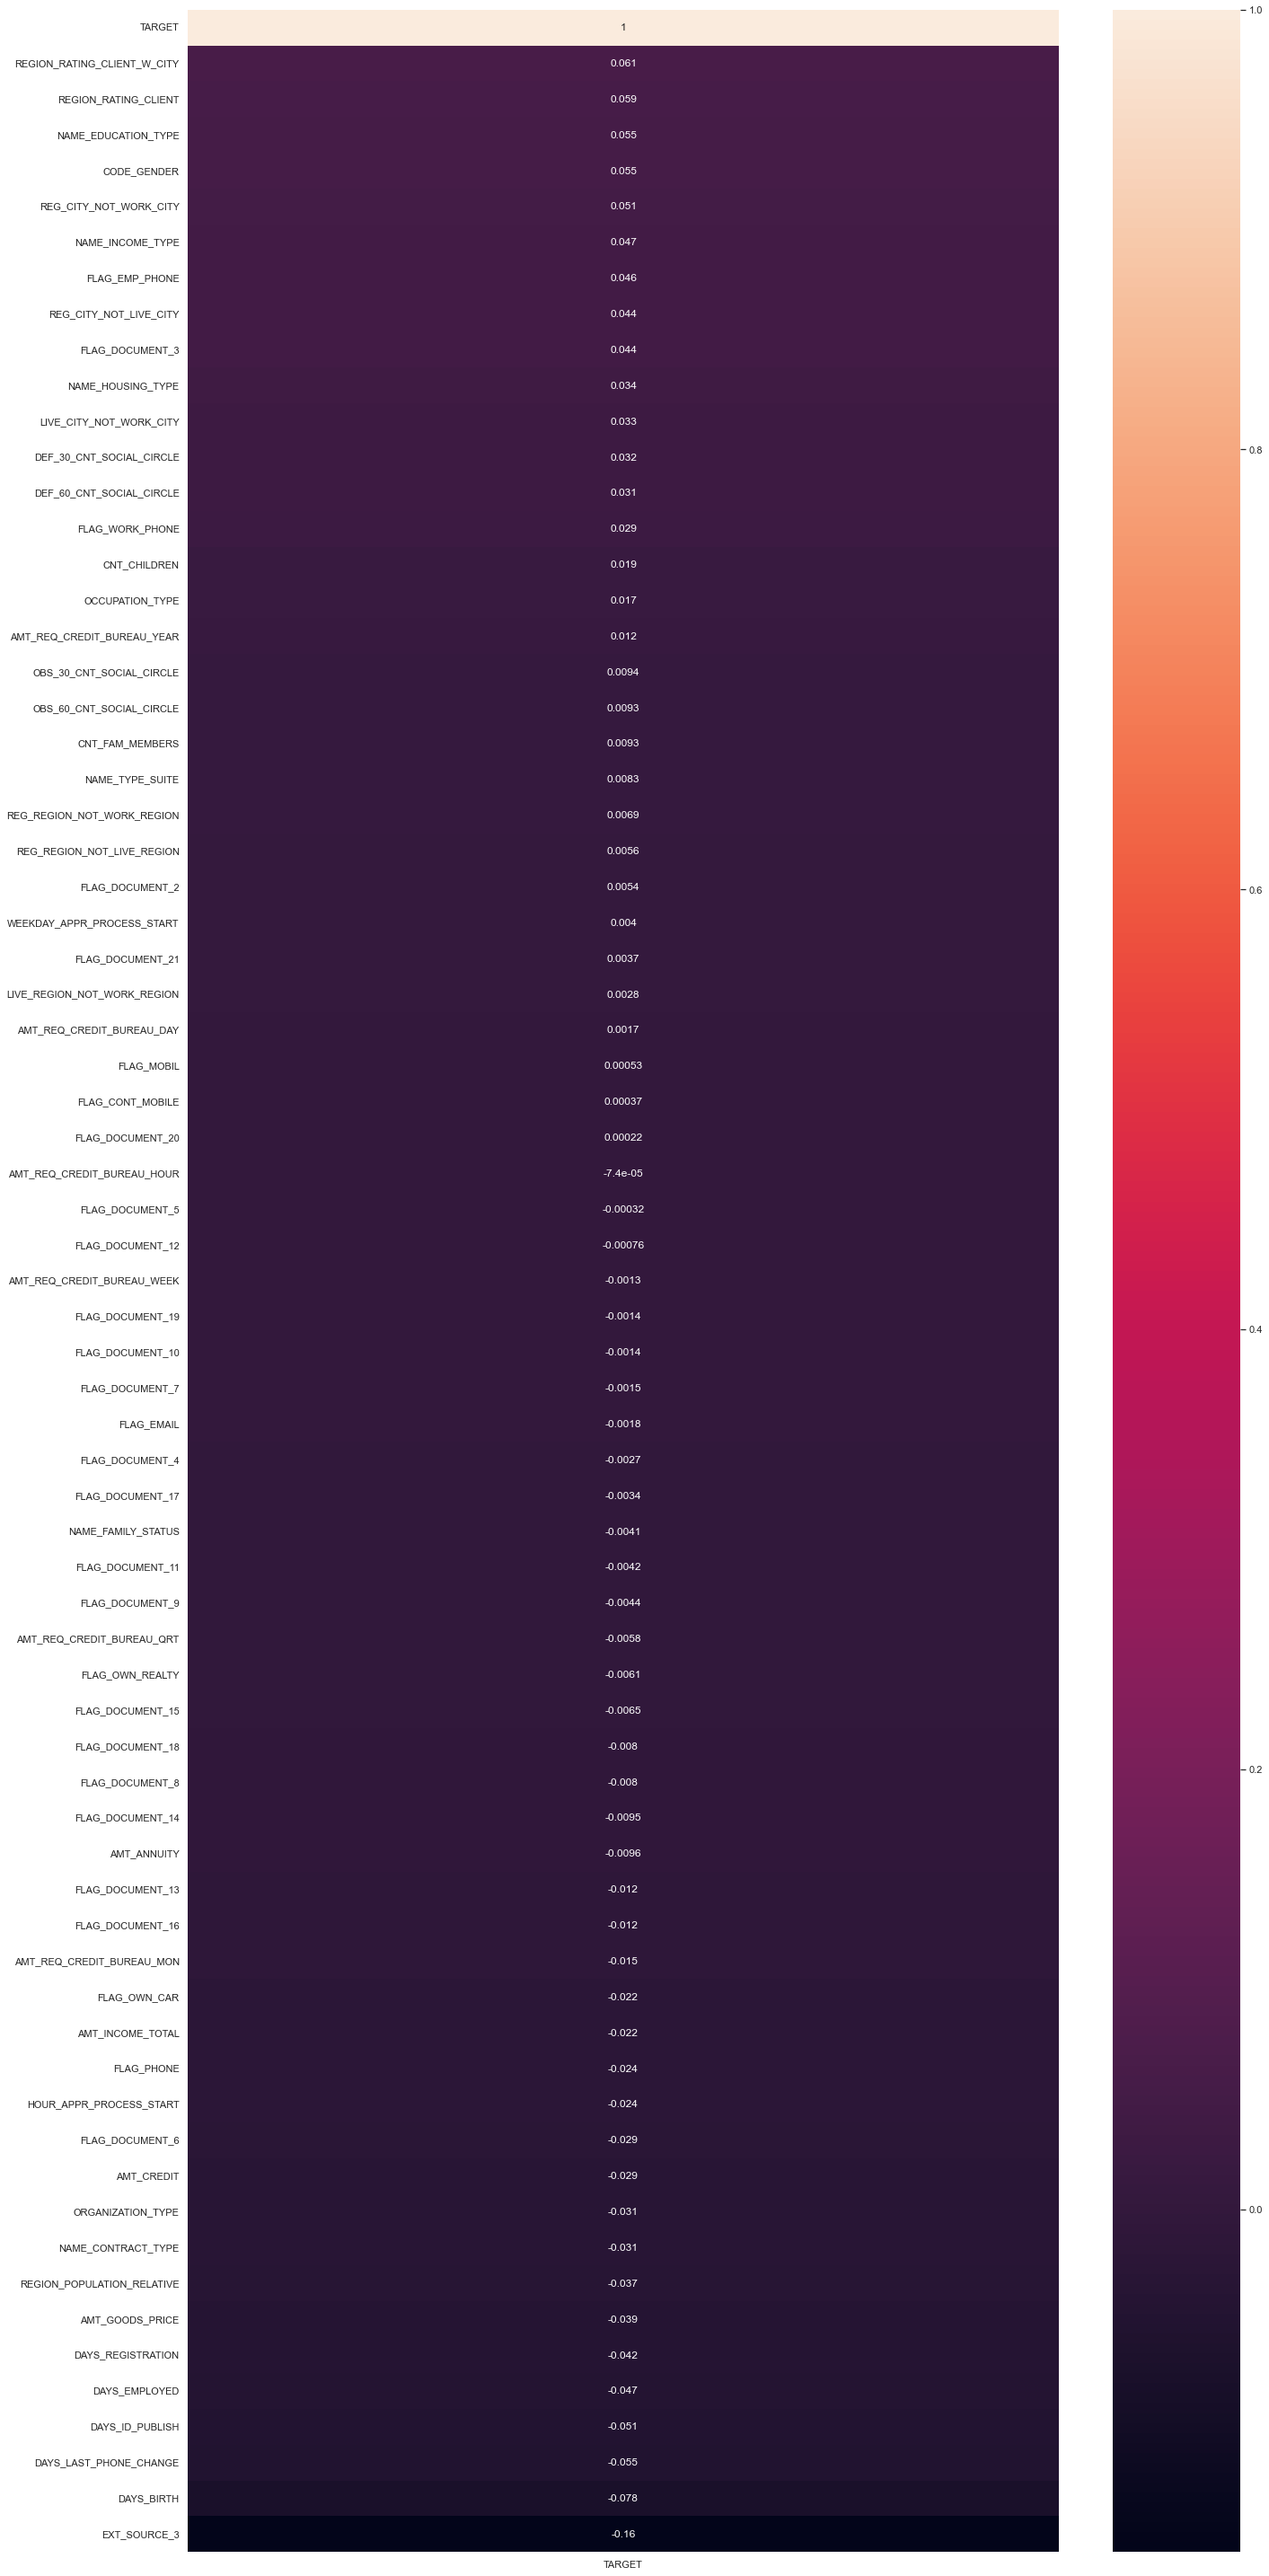

In [ ]:
# Create correlation matrix
corr_matrix = df_train.corr()
plt.figure(figsize=(20,40))
sns.heatmap(corr_matrix[['TARGET']].sort_values(by=['TARGET'],ascending=False,),annot=True)

In [ ]:
# feature selection
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Features', 'Score']
print('The features that correlate well with target feature:\n')
result = featureScores.sort_values(by=['Score'], ascending=False).reset_index(drop=True)
result

The features that correlate well with target feature:



,Features,Score
0,DAYS_EMPLOYED,1.954124e+08
1,AMT_GOODS_PRICE,9.855969e+07
2,AMT_CREDIT,6.520411e+07
3,AMT_INCOME_TOTAL,5.127019e+06
4,DAYS_BIRTH,2.235391e+06
5,DAYS_REGISTRATION,1.348566e+06
6,DAYS_LAST_PHONE_CHANGE,6.656876e+05
7,DAYS_ID_PUBLISH,6.195946e+05
8,AMT_ANNUITY,1.863401e+05
9,ORGANIZATION_TYPE,4.138607e+03


In [ ]:
result.Features.unique()

array(['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT',
       'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_REGISTRATION',
       'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY',
       'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY',
       'CODE_GENDER', 'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY',
       'NAME_CONTRACT_TYPE', 'NAME_HOUSING_TYPE', 'FLAG_DOCUMENT_6',
       'AMT_REQ_CREDIT_BUREAU_MON', 'FLAG_WORK_PHONE', 'FLAG_DOCUMENT_3',
       'HOUR_APPR_PROCESS_START', 'OCCUPATION_TYPE',
       'REGION_RATING_CLIENT_W_CITY', 'CNT_CHILDREN',
       'REGION_RATING_CLIENT', 'FLAG_PHONE', 'FLAG_EMP_PHONE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'FLAG_OWN_CAR', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_14',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'FLAG_DOCUMENT_18', 'FLA

Top 5 best feature based KBest
1. DAYS_EMPLOYED
2. AMT_GOODS_PRICE
3. AMT_CREDIT
4. AMT_INCOME_TOTAL
5. DAYS_BIRTH

Because we have 71 columns, we should pick which is the best feature before move to Machine Learning. We already know about best features using KBest. We will take about top 25 Features in the next step

In [ ]:
# define x and y features (top 25 features)
x_top25 = df_upsampled[['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT',
       'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_REGISTRATION',
       'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY',
       'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY',
       'CODE_GENDER', 'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY',
       'NAME_CONTRACT_TYPE', 'NAME_HOUSING_TYPE', 'FLAG_DOCUMENT_6',
       'AMT_REQ_CREDIT_BUREAU_MON', 'FLAG_WORK_PHONE', 'FLAG_DOCUMENT_3']]
y_balanced = df_upsampled['TARGET']

In [ ]:
x_top25.head()

,DAYS_EMPLOYED,AMT_GOODS_PRICE,AMT_CREDIT,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,AMT_ANNUITY,ORGANIZATION_TYPE,NAME_INCOME_TYPE,REG_CITY_NOT_WORK_CITY,CODE_GENDER,REG_CITY_NOT_LIVE_CITY,NAME_EDUCATION_TYPE,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_3,DEF_60_CNT_SOCIAL_CIRCLE,LIVE_CITY_NOT_WORK_CITY,NAME_CONTRACT_TYPE,NAME_HOUSING_TYPE,FLAG_DOCUMENT_6,AMT_REQ_CREDIT_BUREAU_MON,FLAG_WORK_PHONE,FLAG_DOCUMENT_3
73927,365243,1327500.0,1558804.5,54000.0,21638,8890.0,1558.0,4123,41931.0,57,3,0,0,0,4,0.0,0.733815,0.0,0,0,1,1,0.0,0,0
56023,365243,337500.0,337500.0,126000.0,23703,1004.0,1499.0,3908,16875.0,57,3,0,0,0,4,0.0,0.438281,0.0,0,1,1,0,0.0,0,0
188117,2553,675000.0,746280.0,180000.0,15338,9347.0,1115.0,4414,54306.0,42,7,0,0,0,4,0.0,0.535276,0.0,0,0,2,0,0.0,1,1
148097,11309,225000.0,314100.0,103500.0,19631,8579.0,106.0,3164,12091.5,16,7,0,0,0,2,0.0,0.432962,0.0,0,0,1,0,1.0,0,1
6433,131,153000.0,233784.0,81000.0,9883,1493.0,0.0,2369,11029.5,42,7,0,0,0,4,1.0,0.535276,0.0,0,0,1,0,0.0,0,1


# Modeling

Because our DataFrame have target/label so we can call this Supervised learning. Here we will create using some of Supervised learning algorithm to model our data

In [ ]:
# splitting tha data
X_train, X_test, y_train, y_test = train_test_split(x_top25, y_balanced, test_size=0.2, random_state=30)
print(X_train.shape, X_test.shape)

(452297, 25) (113075, 25)


In [ ]:
# normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

I will create function to train, test and see model score

In [ ]:
def train(name):
    model = name().fit(X_train,y_train)
    y_pred=model.predict(X_train)
    print(classification_report(y_train,y_pred))
    cm_train = confusion_matrix(y_train, y_pred)
    print('Confusion Matrix: {}'.format(cm_train))
    sns.heatmap(cm_train, annot=True, fmt='d', cmap="Blues")

In [ ]:
def test(name):
    model = name().fit(X_train,y_train)
    y_pred_test = model.predict(X_test)
    print(classification_report(y_test,y_pred_test))
    cm_test = confusion_matrix(y_pred_test, y_test)
    print('Confusion Matrix: {}'.format(cm_test))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap="Blues")

In [ ]:
def score(name):
    model = name().fit(X_train,y_train)
    y_pred_test = model.predict(X_test)
    acc_train=round(model.score(X_train,y_train)*100,3)
    acc_test=round(model.score(X_test,y_test)*100,3)
    print("Training Accuracy: % {}".format(acc_train))
    print("Test Accuracy: % {}".format(acc_test))
    roc_auc_new= round(roc_auc_score(y_test, y_pred_test),4)
    print('ROC AUC:', roc_auc_new)
    gap = round(abs(acc_train-acc_test),4)
    print('gap:', gap)
    precision= precision_score(y_test,y_pred_test)
    print('precision:',precision)
    recall= recall_score(y_test,y_pred_test)
    print('recall:',recall)

## Logistic Regression

              precision    recall  f1-score   support

           0       0.65      0.66      0.66    226354
           1       0.66      0.65      0.65    225943

    accuracy                           0.65    452297
   macro avg       0.65      0.65      0.65    452297
weighted avg       0.65      0.65      0.65    452297

Confusion Matrix: [[149360  76994]
 [ 79606 146337]]


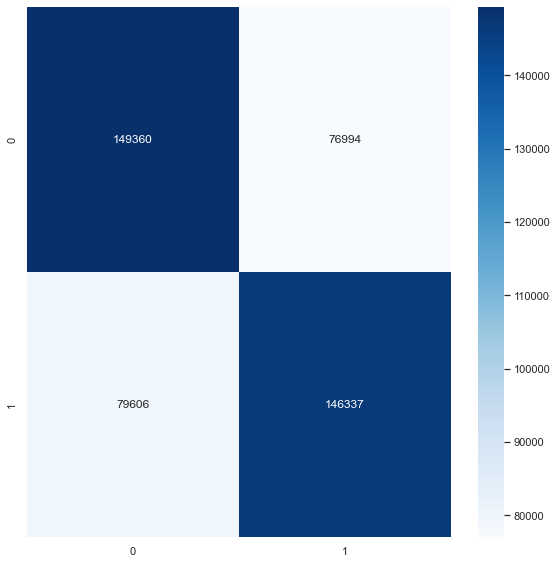

In [ ]:
train(LogisticRegression)

              precision    recall  f1-score   support

           0       0.65      0.66      0.66     56332
           1       0.66      0.65      0.65     56743

    accuracy                           0.65    113075
   macro avg       0.65      0.65      0.65    113075
weighted avg       0.65      0.65      0.65    113075

Confusion Matrix: [[37386 20101]
 [18946 36642]]


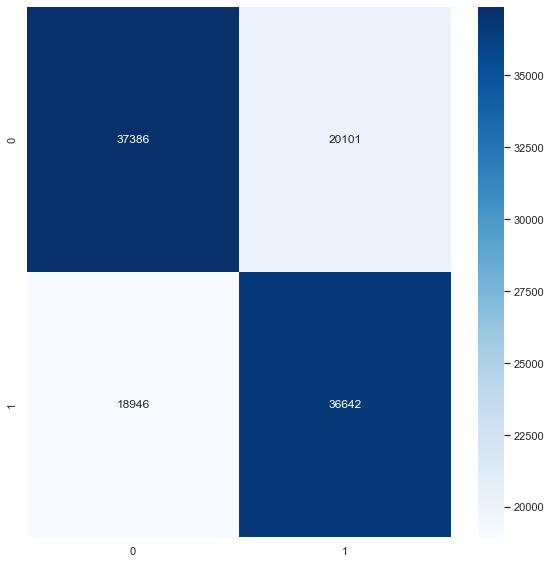

In [ ]:
test(LogisticRegression)

In [ ]:
score(LogisticRegression)

Training Accuracy: % 65.377
Test Accuracy: % 65.468
ROC AUC: 0.6547
gap: 0.091
precision: 0.6591710441102396
recall: 0.6457536612445588


In [ ]:
Logistic_Regression=['Logistic Regression',65.377,65.468,0.6547,0.659,0.645,0.091]

## Decision Tree

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226354
           1       1.00      1.00      1.00    225943

    accuracy                           1.00    452297
   macro avg       1.00      1.00      1.00    452297
weighted avg       1.00      1.00      1.00    452297

Confusion Matrix: [[226354      0]
 [     0 225943]]


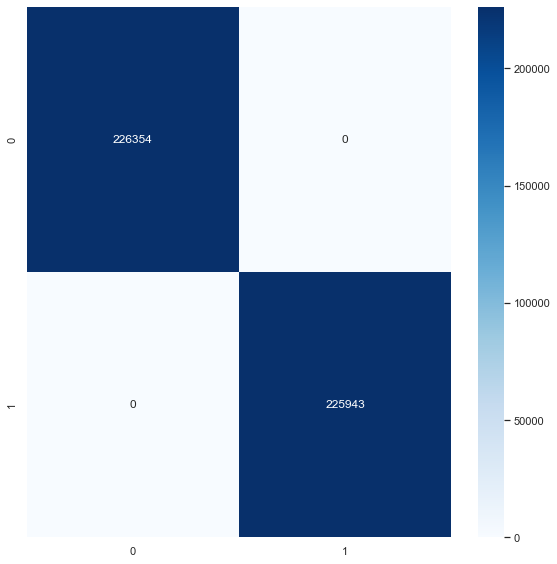

In [ ]:
train(DecisionTreeClassifier)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86     56332
           1       0.89      0.81      0.85     56743

    accuracy                           0.86    113075
   macro avg       0.86      0.86      0.86    113075
weighted avg       0.86      0.86      0.86    113075

Confusion Matrix: [[50859 10810]
 [ 5473 45933]]


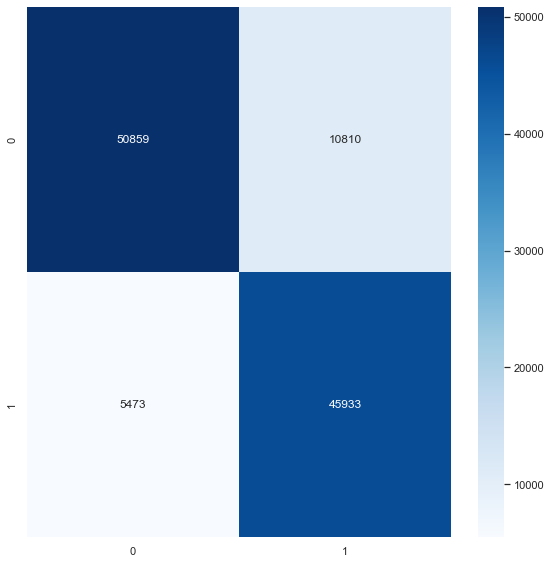

In [ ]:
test(DecisionTreeClassifier)

In [ ]:
score(DecisionTreeClassifier)

Training Accuracy: % 100.0
Test Accuracy: % 85.547
ROC AUC: 0.8556
gap: 14.453
precision: 0.8929655279744767
recall: 0.8089455968137039


In [ ]:
Decision_Tree = ['Decision Tree',100,85.547,0.8556,0.892,0.808,14.453]

## Random Forest

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226354
           1       1.00      1.00      1.00    225943

    accuracy                           1.00    452297
   macro avg       1.00      1.00      1.00    452297
weighted avg       1.00      1.00      1.00    452297

Confusion Matrix: [[226354      0]
 [     0 225943]]


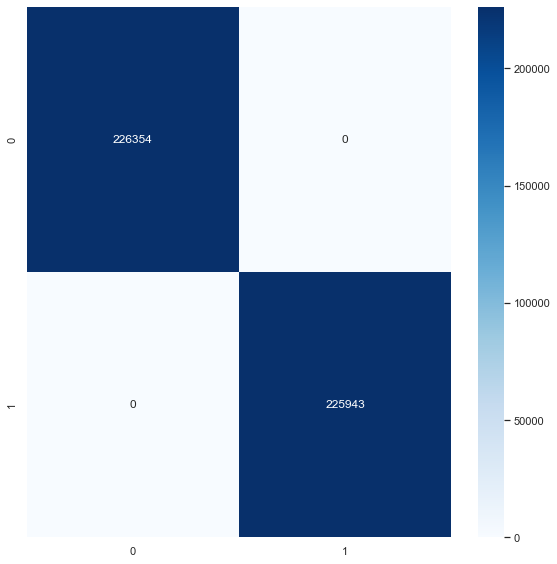

In [ ]:
train(RandomForestClassifier)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56332
           1       1.00      1.00      1.00     56743

    accuracy                           1.00    113075
   macro avg       1.00      1.00      1.00    113075
weighted avg       1.00      1.00      1.00    113075

Confusion Matrix: [[56125    85]
 [  207 56658]]


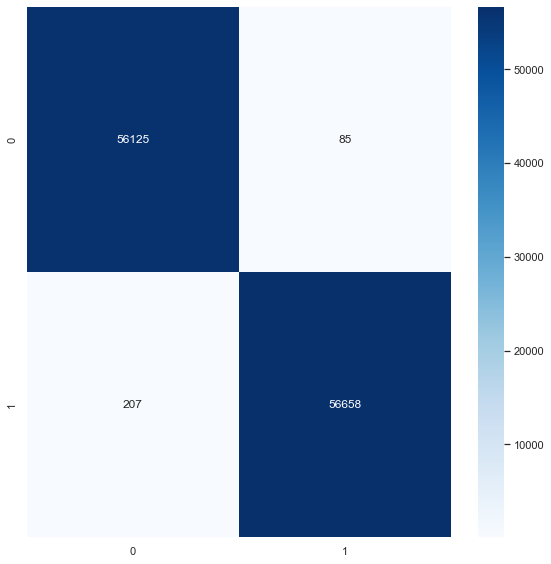

In [ ]:
test(RandomForestClassifier)

In [ ]:
score(RandomForestClassifier)

Training Accuracy: % 100.0
Test Accuracy: % 99.702
ROC AUC: 0.997
gap: 0.298
precision: 0.9963569165786695
recall: 0.9977089685071286


In [ ]:
Random_Forest=['Random Forest',100,99.702,0.997,0.996,0.997,0.292]

## Extra trees

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226354
           1       1.00      1.00      1.00    225943

    accuracy                           1.00    452297
   macro avg       1.00      1.00      1.00    452297
weighted avg       1.00      1.00      1.00    452297

Confusion Matrix: [[226354      0]
 [     0 225943]]


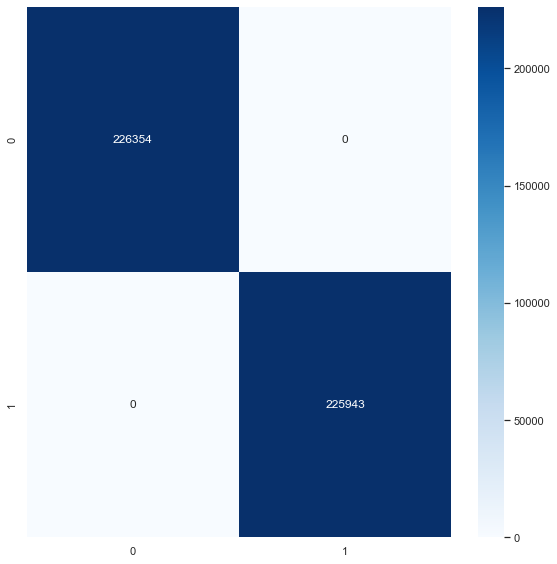

In [ ]:
train(ExtraTreesClassifier)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56332
           1       1.00      1.00      1.00     56743

    accuracy                           1.00    113075
   macro avg       1.00      1.00      1.00    113075
weighted avg       1.00      1.00      1.00    113075

Confusion Matrix: [[56303     9]
 [   29 56734]]


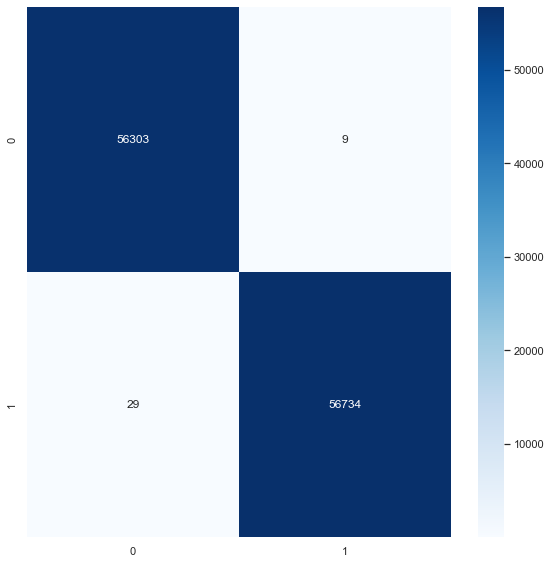

In [ ]:
test(ExtraTreesClassifier)

In [ ]:
score(ExtraTreesClassifier)

Training Accuracy: % 100.0
Test Accuracy: % 99.972
ROC AUC: 0.9997
gap: 0.028
precision: 0.9995947636414891
recall: 0.9998413901274166


In [ ]:
Extra_Trees=['Extra Trees',100,99.972,0.9997,0.999,0.999,0.034]

## K-Nearest Neighbor

              precision    recall  f1-score   support

           0       1.00      0.82      0.90    226354
           1       0.85      1.00      0.92    225943

    accuracy                           0.91    452297
   macro avg       0.92      0.91      0.91    452297
weighted avg       0.92      0.91      0.91    452297

Confusion Matrix: [[186741  39613]
 [   166 225777]]


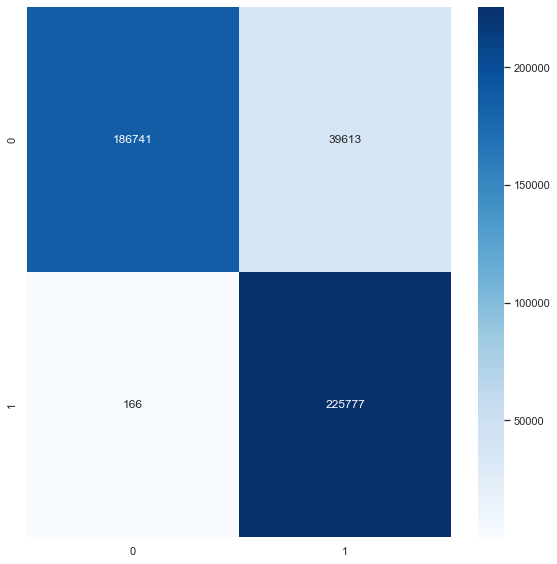

In [ ]:
train(KNeighborsClassifier)

              precision    recall  f1-score   support

           0       1.00      0.76      0.86     56332
           1       0.81      1.00      0.89     56743

    accuracy                           0.88    113075
   macro avg       0.90      0.88      0.88    113075
weighted avg       0.90      0.88      0.88    113075

Confusion Matrix: [[42711   204]
 [13621 56539]]


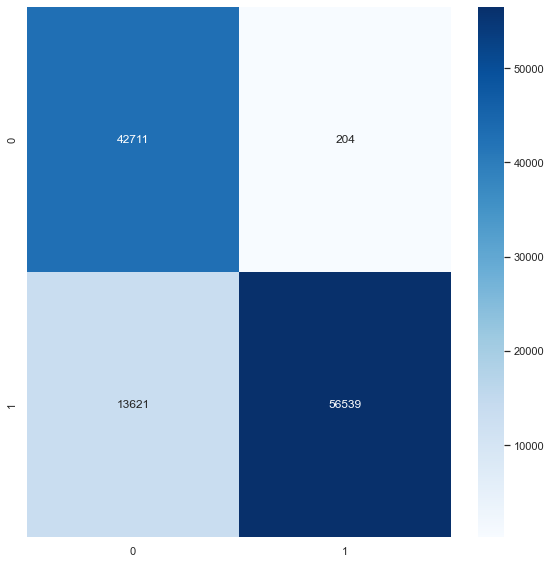

In [ ]:
test(KNeighborsClassifier)

In [ ]:
score(KNeighborsClassifier)

Training Accuracy: % 91.205
Test Accuracy: % 87.774
ROC AUC: 0.8773
gap: 3.431
precision: 0.8058580387685291
recall: 0.9964048428881096


In [ ]:
K_Nearest_Neighbor=['K-Nearest Neighbor',91.205,87.774,0.8773,0.805,0.996,3.431]

## Gaussian Naive Bayes

              precision    recall  f1-score   support

           0       0.63      0.59      0.61    226354
           1       0.61      0.66      0.63    225943

    accuracy                           0.62    452297
   macro avg       0.62      0.62      0.62    452297
weighted avg       0.62      0.62      0.62    452297

Confusion Matrix: [[132468  93886]
 [ 77611 148332]]


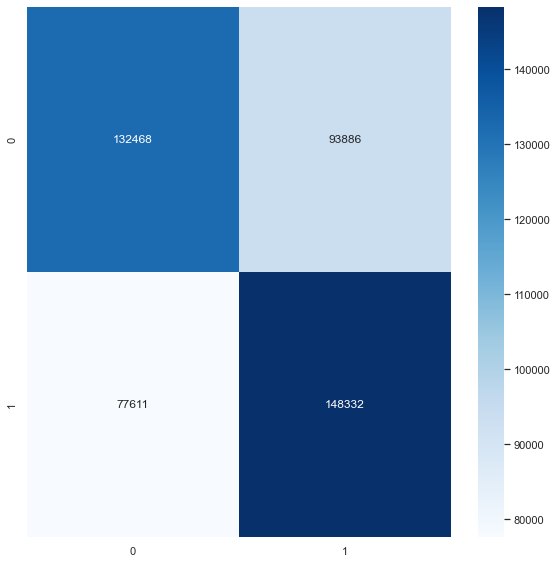

In [ ]:
train(GaussianNB)

              precision    recall  f1-score   support

           0       0.63      0.58      0.61     56332
           1       0.61      0.65      0.63     56743

    accuracy                           0.62    113075
   macro avg       0.62      0.62      0.62    113075
weighted avg       0.62      0.62      0.62    113075

Confusion Matrix: [[32954 19633]
 [23378 37110]]


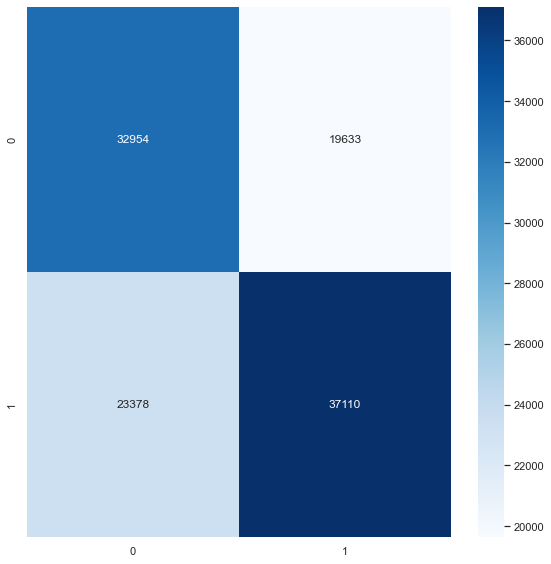

In [ ]:
test(GaussianNB)

In [ ]:
score(GaussianNB)

Training Accuracy: % 62.083
Test Accuracy: % 61.962
ROC AUC: 0.6195
gap: 0.121
precision: 0.6135101177092978
recall: 0.6540013746188957


In [ ]:
Gaussian_Naive_Bayes=['Gaussian Naive Bayes',62.083,61.962,0.6195,0.613,0.654,0.121]

## Gradient Boosting

              precision    recall  f1-score   support

           0       0.67      0.67      0.67    226354
           1       0.67      0.67      0.67    225943

    accuracy                           0.67    452297
   macro avg       0.67      0.67      0.67    452297
weighted avg       0.67      0.67      0.67    452297

Confusion Matrix: [[150740  75614]
 [ 74605 151338]]


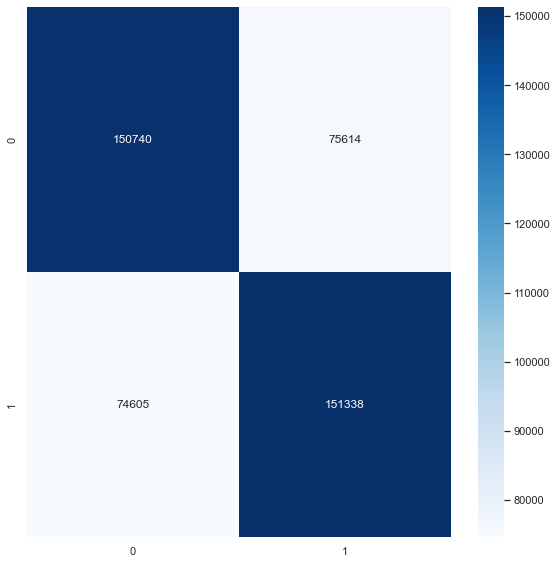

In [ ]:
train(GradientBoostingClassifier)

              precision    recall  f1-score   support

           0       0.67      0.66      0.66     56332
           1       0.67      0.67      0.67     56743

    accuracy                           0.67    113075
   macro avg       0.67      0.67      0.67    113075
weighted avg       0.67      0.67      0.67    113075

Confusion Matrix: [[37246 18709]
 [19086 38034]]


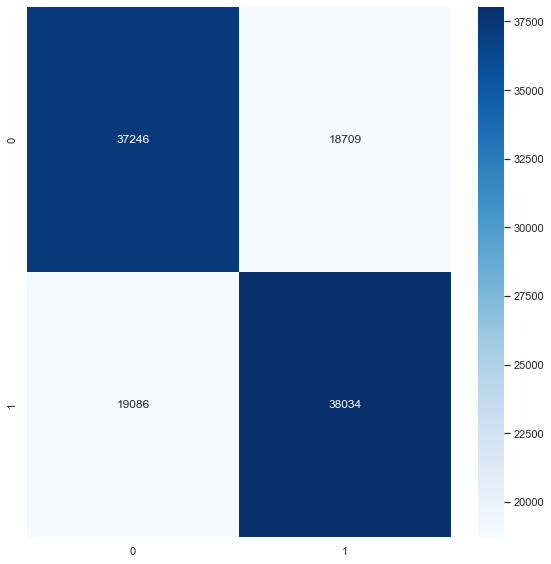

In [ ]:
test(GradientBoostingClassifier)

In [ ]:
score(GradientBoostingClassifier)

Training Accuracy: % 66.788
Test Accuracy: % 66.575
ROC AUC: 0.6657
gap: 0.213
precision: 0.6658613445378151
recall: 0.6702853215374583


In [ ]:
Gradient_Boosting = ['Gradient Boosting',66.788,66.575,0.6657,0.665,0.670,0.213]

# Evaluation

In [ ]:
results = pd.DataFrame([['Logistic Regression',65.377,65.468,0.6547,0.659,0.645,0.091],
                        ['Decision Tree',100,85.547,0.8556,0.892,0.808,14.453],
                        ['Random Forest',100,99.702,0.997,0.996,0.997,0.292],
                        ['Extra Trees',100,99.972,0.9997,0.999,0.999,0.034],
                        ['K-Nearest Neighbor',91.205,87.774,0.8773,0.805,0.996,3.431],
                        ['Gaussian Naive Bayes',62.083,61.962,0.6195,0.613,0.654,0.121],
                        ['Gradient Boosting',66.788,66.575,0.6657,0.665,0.670,0.213]],
                        columns = ["Models", "Training Accuracy Score", "Testing Accuracy Score", "ROC Score", "Precission", "Recall", "gap"])

results.sort_values(by=["Training Accuracy Score", "Testing Accuracy Score","Precission","Recall" ], ascending=False).reset_index(drop=True)

,Models,Training Accuracy Score,Testing Accuracy Score,ROC Score,Precission,Recall,gap
0,Extra Trees,100.000,99.972,0.9997,0.999,0.999,0.034
1,Random Forest,100.000,99.702,0.9970,0.996,0.997,0.292
2,Decision Tree,100.000,85.547,0.8556,0.892,0.808,14.453
3,K-Nearest Neighbor,91.205,87.774,0.8773,0.805,0.996,3.431
4,Gradient Boosting,66.788,66.575,0.6657,0.665,0.670,0.213
5,Logistic Regression,65.377,65.468,0.6547,0.659,0.645,0.091
6,Gaussian Naive Bayes,62.083,61.962,0.6195,0.613,0.654,0.121


Extra Trees model give us the best model to predict home credit score. Training Accuracy and Testing Accuracy no different in significant therefore no indicate this model will overfit or underfit. Additional information, Precision and Recall score also high for Extra Trees. Based on this data, we will use Extra Trees to predict Test data.

# Prediction

In [ ]:
df_test = pd.read_csv('application_test.csv')
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

In [ ]:
df_test.shape

(48744, 121)

Before Deciding to predict this Test Data, we need to treat this Test data same as like train data from scratch. Check missing value until Label encoder test data. The step same like in the training data, so in this section we will only repeat the step by step as we did before

# Check duplicated test

In [ ]:
df_test[df_test['SK_ID_CURR'].duplicated()]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


# Check missing value test

In [ ]:
check_values(df_test).sort_values('nullPct',ascending=False).reset_index(drop=True)

,dataFeatures,dataType,null,nullPct,nunique
0,COMMONAREA_AVG,float64,33495,68.72,2042
1,COMMONAREA_MODE,float64,33495,68.72,2001
2,COMMONAREA_MEDI,float64,33495,68.72,2034
3,NONLIVINGAPARTMENTS_AVG,float64,33347,68.41,241
4,NONLIVINGAPARTMENTS_MODE,float64,33347,68.41,106
5,NONLIVINGAPARTMENTS_MEDI,float64,33347,68.41,134
6,FONDKAPREMONT_MODE,object,32797,67.28,4
7,LIVINGAPARTMENTS_AVG,float64,32780,67.25,1211
8,LIVINGAPARTMENTS_MODE,float64,32780,67.25,602
9,LIVINGAPARTMENTS_MEDI,float64,32780,67.25,843


In [ ]:
df_test.drop(df_test.iloc[:, 44:90], inplace=True, axis=1)
df_test.drop(['OWN_CAR_AGE','EXT_SOURCE_1','APARTMENTS_AVG'], inplace=True, axis=1)

In [ ]:
check_values(df_test).sort_values('nullPct',ascending=False).reset_index(drop=True)

,dataFeatures,dataType,null,nullPct,nunique
0,OCCUPATION_TYPE,object,15605,32.01,18
1,EXT_SOURCE_3,float64,8668,17.78,702
2,AMT_REQ_CREDIT_BUREAU_YEAR,float64,6049,12.41,16
3,AMT_REQ_CREDIT_BUREAU_QRT,float64,6049,12.41,8
4,AMT_REQ_CREDIT_BUREAU_MON,float64,6049,12.41,7
5,AMT_REQ_CREDIT_BUREAU_WEEK,float64,6049,12.41,3
6,AMT_REQ_CREDIT_BUREAU_DAY,float64,6049,12.41,3
7,AMT_REQ_CREDIT_BUREAU_HOUR,float64,6049,12.41,3
8,NAME_TYPE_SUITE,object,911,1.87,7
9,OBS_30_CNT_SOCIAL_CIRCLE,float64,29,0.06,28


In [ ]:
category_columns = df_test.select_dtypes(include=['object'])
numeric_columns = df_test.select_dtypes(include=['int64','float64'])

for column in df_test:
    if df_test[column].isnull().any():
        if(column in category_columns):
            df_test[column]=df_test[column].fillna(df_test[column].mode()[0])
        else:
            df_test[column]=df_test[column].fillna(df_test[column].median())

In [ ]:
check_values(df_test).sort_values('nullPct',ascending=False).reset_index(drop=True)

,dataFeatures,dataType,null,nullPct,nunique
0,SK_ID_CURR,int64,0,0.0,48744
1,NAME_CONTRACT_TYPE,object,0,0.0,2
2,FLAG_DOCUMENT_8,int64,0,0.0,2
3,FLAG_DOCUMENT_7,int64,0,0.0,2
4,FLAG_DOCUMENT_6,int64,0,0.0,2
5,FLAG_DOCUMENT_5,int64,0,0.0,2
6,FLAG_DOCUMENT_4,int64,0,0.0,2
7,FLAG_DOCUMENT_3,int64,0,0.0,2
8,FLAG_DOCUMENT_2,int64,0,0.0,1
9,DAYS_LAST_PHONE_CHANGE,float64,0,0.0,3579


# Outliers test

In [ ]:
df_test.loc[:,'DAYS_BIRTH':'DAYS_ID_PUBLISH'] = df_test.loc[:,'DAYS_BIRTH':'DAYS_ID_PUBLISH'].abs()
df_test.loc[:,'DAYS_LAST_PHONE_CHANGE'] = df_test.loc[:,'DAYS_LAST_PHONE_CHANGE'] .abs()
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,19241,2329,5170.0,812,1,1,0,1,0,1,Laborers,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.789654,0.159520,0.0,0.0,0.0,0.0,1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,18064,4469,9118.0,1623,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.291656,0.432962,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.019101,20038,4458,2175.0,3503,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,0.699787,0.610991,0.0,0.0,0.0,0.0,856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,13976,1866,2000.0,4208,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,0.509677,0.612704,0.0,0.0,0.0,0.0,1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,13040,2191,4000.0,4262,1,1,1,1,0,0,Laborers,3.0,2,2,FRIDAY,5,0,0,0,0,1,1,Business Entity Type 3,0.425687,0.519097,0.0,0.0,0.0,0.0,821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [ ]:
sample_test = df_test[df_test.columns[df_test.columns.isin(['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE'])]]
sample_test.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
0,135000.0,568800.0,20560.5,450000.0
1,99000.0,222768.0,17370.0,180000.0
2,202500.0,663264.0,69777.0,630000.0
3,315000.0,1575000.0,49018.5,1575000.0
4,180000.0,625500.0,32067.0,625500.0


In [ ]:
keep_test = df_test[df_test.columns[~df_test.columns.isin(['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE'])]]
keep_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,19241,2329,5170.0,812,1,1,0,1,0,1,Laborers,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.789654,0.159520,0.0,0.0,0.0,0.0,1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,18064,4469,9118.0,1623,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.291656,0.432962,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,Unaccompanied,Working,Higher education,Married,House / apartment,0.019101,20038,4458,2175.0,3503,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,0.699787,0.610991,0.0,0.0,0.0,0.0,856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,13976,1866,2000.0,4208,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,0.509677,0.612704,0.0,0.0,0.0,0.0,1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,13040,2191,4000.0,4262,1,1,1,1,0,0,Laborers,3.0,2,2,FRIDAY,5,0,0,0,0,1,1,Business Entity Type 3,0.425687,0.519097,0.0,0.0,0.0,0.0,821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [ ]:
sample_test.describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
count,4.874400e+04,4.874400e+04,48744.000000,4.874400e+04
mean,1.784318e+05,5.167404e+05,29424.651219,4.626188e+05
std,1.015226e+05,3.653970e+05,16012.584824,3.367102e+05
min,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04
25%,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05
50%,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05
75%,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05
max,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06


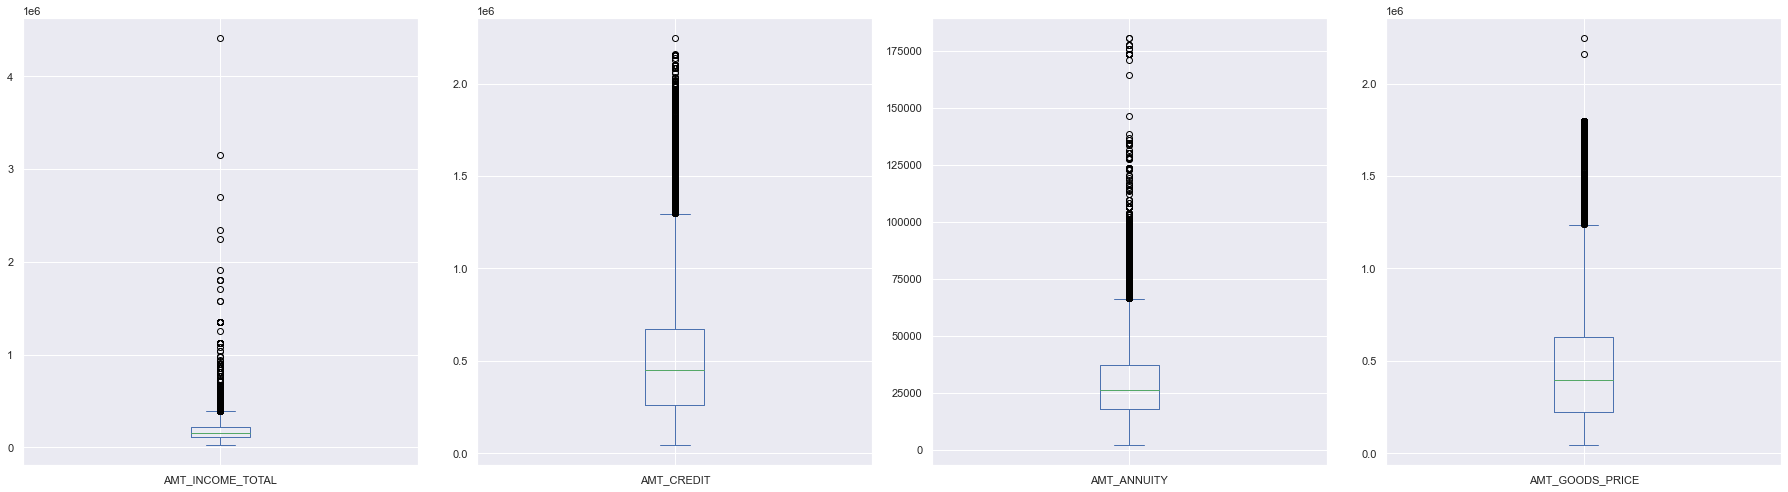

In [ ]:
sample_test.plot(kind = 'box', subplots=True, figsize=(25,200), layout = (30,4))
plt.show()

In [ ]:
# Handling Outlier
Q1 = (sample_test[sample_test.columns]).quantile(0.25)
Q3 = (sample_test[sample_test.columns]).quantile(0.75)
IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('Maximum value in each variable : ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nMinimum value in each variable: ')
print(minimum)
more_than = (sample_test > maximum)
lower_than = (sample_test < minimum)

sample_test = sample_test.mask(more_than, maximum, axis=1) 
sample_test = sample_test.mask(lower_than, minimum, axis=1) 

print('\nAfter Handling Outlier: ')
print(sample_test.describe())

Maximum value in each variable : 
AMT_INCOME_TOTAL     393750.00
AMT_CREDIT          1296540.00
AMT_ANNUITY           66516.75
AMT_GOODS_PRICE     1237500.00
dtype: float64

Minimum value in each variable: 
AMT_INCOME_TOTAL    -56250.00
AMT_CREDIT         -360900.00
AMT_ANNUITY         -11153.25
AMT_GOODS_PRICE    -382500.00
dtype: float64

After Handling Outlier: 
       AMT_INCOME_TOTAL    AMT_CREDIT   AMT_ANNUITY  AMT_GOODS_PRICE
count      48744.000000  4.874400e+04  48744.000000     4.874400e+04
mean      174332.134972  5.000353e+05  29056.522110     4.485805e+05
std        80187.462642  3.137915e+05  14660.046604     2.915355e+05
min        26941.500000  4.500000e+04   2295.000000     4.500000e+04
25%       112500.000000  2.606400e+05  17973.000000     2.250000e+05
50%       157500.000000  4.500000e+05  26199.000000     3.960000e+05
75%       225000.000000  6.750000e+05  37390.500000     6.300000e+05
max       393750.000000  1.296540e+06  66516.750000     1.237500e+06


In [ ]:
df_test = pd.concat([sample_test,keep_test], axis=1)
df_test.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,135000.0,568800.0,20560.50,450000.0,100001,Cash loans,F,N,Y,0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,19241,2329,5170.0,812,1,1,0,1,0,1,Laborers,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.789654,0.159520,0.0,0.0,0.0,0.0,1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,99000.0,222768.0,17370.00,180000.0,100005,Cash loans,M,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,18064,4469,9118.0,1623,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.291656,0.432962,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,202500.0,663264.0,66516.75,630000.0,100013,Cash loans,M,Y,Y,0,Unaccompanied,Working,Higher education,Married,House / apartment,0.019101,20038,4458,2175.0,3503,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,0.699787,0.610991,0.0,0.0,0.0,0.0,856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,315000.0,1296540.0,49018.50,1237500.0,100028,Cash loans,F,N,Y,2,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,13976,1866,2000.0,4208,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,0.509677,0.612704,0.0,0.0,0.0,0.0,1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,180000.0,625500.0,32067.00,625500.0,100038,Cash loans,M,Y,N,1,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,13040,2191,4000.0,4262,1,1,1,1,0,0,Laborers,3.0,2,2,FRIDAY,5,0,0,0,0,1,1,Business Entity Type 3,0.425687,0.519097,0.0,0.0,0.0,0.0,821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [ ]:
df_test.describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,SK_ID_CURR,CNT_CHILDREN,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,4.874400e+04,48744.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.0,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.0,48744.000000,48744.0,48744.0,48744.0,48744.0,48744.0,48744.0,48744.000000,48744.0,48744.0,48744.0,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000
mean,174332.134972,5.000353e+05,29056.522110,4.485805e+05,277796.676350,0.397054,0.021226,16068.084605,71496.398900,4967.652716,3051.712949,0.999979,0.809720,0.204702,0.998400,0.263130,0.162646,2.146767,2.038159,2.012596,12.007365,0.018833,0.055166,0.042036,0.077466,0.224664,0.174216,0.518028,0.503483,1.446783,0.143566,1.434884,0.101079,1077.766228,0.0,0.786620,0.000103,0.014751,0.087477,0.000041,0.088462,0.004493,0.0,0.001169,0.0,0.0,0.0,0.0,0.0,0.0,0.001559,0.0,0.0,0.0,0.001846,0.001580,0.002441,0.008145,0.479033,1.985783
std,80187.462642,3.137915e+05,14660.046604,2.915355e+05,103169.547296,0.709047,0.014428,4325.900393,142404.422992,3552.612035,1569.276709,0.004529,0.392526,0.403488,0.039971,0.440337,0.369046,0.890423,0.522694,0.515804,3.278172,0.135937,0.228306,0.200673,0.267332,0.417365,0.379299,0.181264,0.171978,3.607153,0.514272,3.579231,0.403679,878.920740,0.0,0.409698,0.010128,0.120554,0.282536,0.006405,0.283969,0.066879,0.0,0.034176,0.0,0.0,0.0,0.0,0.0,0.0,0.039456,0.0,0.0,0.0,0.043406,0.043179,0.050582,0.103858,0.673449,1.721001
min,26941.500000,4.500000e+04,2295.000000,4.500000e+04,100001.000000,0.000000,0.000253,7338.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000008,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,112500.000000,2.606400e+05,17973.000000,2.250000e+05,188557.750000,0.000000,0.010006,12496.000000,1048.000000,1901.000000,1706.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.408082,0.399676,0.000000,0.000000,0.000000,0.000000,363.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,157500.000000,4.500000e+05,26199.000000,

# Label Encoder test

In [ ]:
LE = LabelEncoder()
df_test[['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'
       ]]  = df_test[['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'
       ]].apply(LE.fit_transform)

In [ ]:
df_test.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,135000.0,568800.0,20560.50,450000.0,100001,0,0,0,1,0,6,6,1,1,1,0.018850,19241,2329,5170.0,812,1,1,0,1,0,1,8,2.0,2,2,5,18,0,0,0,0,0,0,28,0.789654,0.159520,0.0,0.0,0.0,0.0,1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,99000.0,222768.0,17370.00,180000.0,100005,0,1,0,1,0,6,6,4,1,1,0.035792,18064,4469,9118.0,1623,1,1,0,1,0,0,9,2.0,2,2,0,9,0,0,0,0,0,0,42,0.291656,0.432962,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,202500.0,663264.0,66516.75,630000.0,100013,0,1,1,1,0,6,6,1,1,1,0.019101,20038,4458,2175.0,3503,1,1,0,1,0,0,4,2.0,2,2,1,14,0,0,0,0,0,0,54,0.699787,0.610991,0.0,0.0,0.0,0.0,856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,315000.0,1296540.0,49018.50,1237500.0,100028,0,0,0,1,2,6,6,4,1,1,0.026392,13976,1866,2000.0,4208,1,1,0,1,1,0,14,4.0,2,2,6,11,0,0,0,0,0,0,5,0.509677,0.612704,0.0,0.0,0.0,0.0,1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,180000.0,625500.0,32067.00,625500.0,100038,0,1,1,0,1,6,6,4,1,1,0.010032,13040,2191,4000.0,4262,1,1,1,1,0,0,8,3.0,2,2,0,5,0,0,0,0,1,1,5,0.425687,0.519097,0.0,0.0,0.0,0.0,821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


# Predict test

After cleaning data, now it's time to predict our test data !

In [ ]:
prediction_test = df_test[['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT',
       'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_REGISTRATION',
       'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY',
       'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY',
       'CODE_GENDER', 'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY',
       'NAME_CONTRACT_TYPE', 'NAME_HOUSING_TYPE', 'FLAG_DOCUMENT_6',
       'AMT_REQ_CREDIT_BUREAU_MON', 'FLAG_WORK_PHONE', 'FLAG_DOCUMENT_3']]
prediction_test.head()

,DAYS_EMPLOYED,AMT_GOODS_PRICE,AMT_CREDIT,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,AMT_ANNUITY,ORGANIZATION_TYPE,NAME_INCOME_TYPE,REG_CITY_NOT_WORK_CITY,CODE_GENDER,REG_CITY_NOT_LIVE_CITY,NAME_EDUCATION_TYPE,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_3,DEF_60_CNT_SOCIAL_CIRCLE,LIVE_CITY_NOT_WORK_CITY,NAME_CONTRACT_TYPE,NAME_HOUSING_TYPE,FLAG_DOCUMENT_6,AMT_REQ_CREDIT_BUREAU_MON,FLAG_WORK_PHONE,FLAG_DOCUMENT_3
0,2329,450000.0,568800.0,135000.0,19241,5170.0,1740.0,812,20560.50,28,6,0,0,0,1,0.0,0.159520,0.0,0,0,1,0,0.0,0,1
1,4469,180000.0,222768.0,99000.0,18064,9118.0,0.0,1623,17370.00,42,6,0,1,0,4,0.0,0.432962,0.0,0,0,1,0,0.0,0,1
2,4458,630000.0,663264.0,202500.0,20038,2175.0,856.0,3503,66516.75,54,6,0,1,0,1,0.0,0.610991,0.0,0,0,1,0,0.0,0,0
3,1866,1237500.0,1296540.0,315000.0,13976,2000.0,1805.0,4208,49018.50,5,6,0,0,0,4,0.0,0.612704,0.0,0,0,1,0,0.0,0,1
4,2191,625500.0,625500.0,180000.0,13040,4000.0,821.0,4262,32067.00,5,6,1,1,0,4,0.0,0.519097,0.0,1,0,1,0,0.0,1,1


In [ ]:
model_extra_trees = ExtraTreesClassifier().fit(X_train,y_train)

In [ ]:
predict = pd.Series(model_extra_trees.predict(prediction_test), name = "TARGET").astype(int)
results = pd.concat([df_test['SK_ID_CURR'], predict],axis = 1)
results.to_csv("application prediction.csv", index = False)
results.head()

,SK_ID_CURR,TARGET
0,100001,0
1,100005,0
2,100013,0
3,100028,0
4,100038,0


The result will be saved in csv format named "application prediction.csv"

# Recommendation

Based on our exploration from EDA to machine learning model, here is some Recommendation that will be usefull to improve our business :

1. Cash loans give us more client rather than Revolving loans but the problem repay the loans almost 2 times
higher. We can create a campaign for our client to choose Revolving loans as contract type when applying loans.

2. Give campaign to income type Maternity leave, Unemployed, Businessman, and student because only a few of them
applying for loans.
3. Most of our client in Middle age range 40-60 followed by Young age range 20-40 but the problem repay the loans almost 2 times on
Young age. We should give proper contract type if any Young age wanna apply loans so that they will have no problem in repaying the loans.
4. Region Rating Client 2 have more client than 1 and 3. We should attract our client also in region 1 and 3 to expand our business.
5. The best models to predict Home Credit Score is using **Extra Trees Classifier**. Because the value of Training and Test accuraccy high and
no different at all. This model also will be good if we try to decrease the number of False Negative ( Condition where the client
have problem in repaying the loans but our prediction give the result they are have no problem) in that case we will also look **Recall score**.